# Part A Preprocessing

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from IPython.display import Image

%matplotlib inline

### Panda Read CSV

In [2]:
dfdisp = pd.read_csv('disp_data.csv')

### Displacement v. KY Graph

Text(0, 0.5, 'Displacement (cm)')

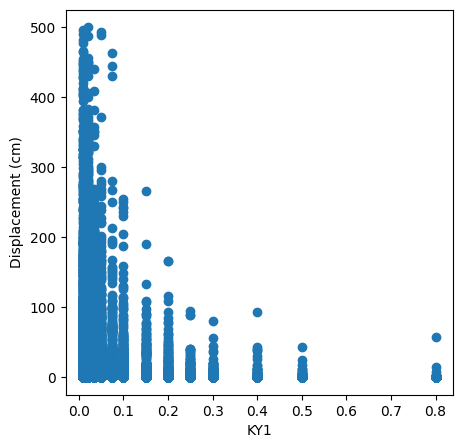

In [3]:
Disp = dfdisp.Disp
KY1 = dfdisp.KY1
fig,ax = plt.subplots(figsize = [5,5])
ax.scatter(dfdisp['KY1'],dfdisp['Disp'])
ax.set_xlabel('KY1')
ax.set_ylabel('Displacement (cm)')

### Displacement v. Period Graph

Text(0, 0.5, 'Displacement (cm)')

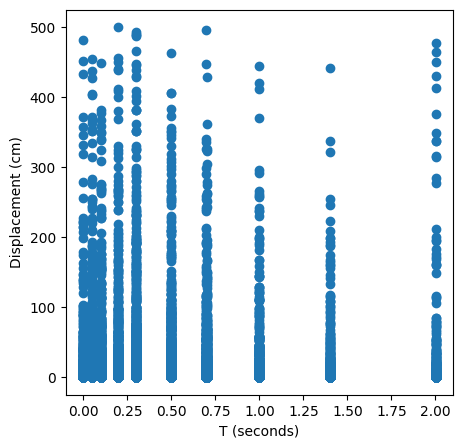

In [4]:
T = dfdisp.T
fig,ax = plt.subplots(figsize = [5,5])
ax.scatter(dfdisp['T'],dfdisp['Disp'])
ax.set_xlabel('T (seconds)')
ax.set_ylabel('Displacement (cm)')

### Displacement v. Magnitude Graph

Text(0, 0.5, 'Displacement (cm)')

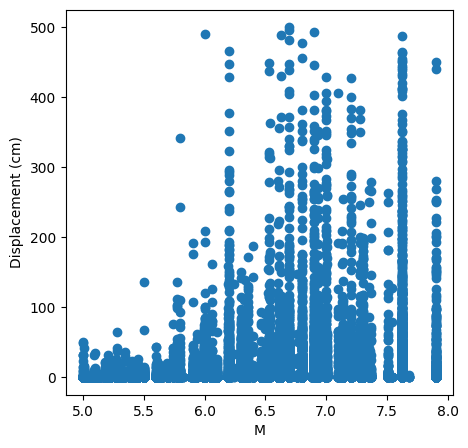

In [5]:
M = dfdisp.M
fig,ax = plt.subplots(figsize = [5,5])
ax.scatter(dfdisp['M'],dfdisp['Disp'])
ax.set_xlabel('M')
ax.set_ylabel('Displacement (cm)')

### Displacement v. ClstD

(-10.0, 250.0)

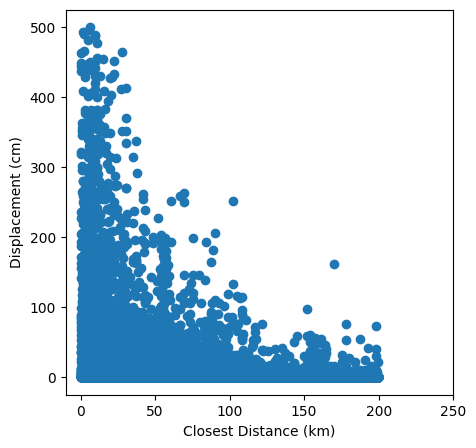

In [6]:
ClstD = dfdisp.ClstD
fig,ax = plt.subplots(figsize = [5,5])
ax.scatter(dfdisp['ClstD'],dfdisp['Disp'])
ax.set_xlabel('Closest Distance (km)')
ax.set_ylabel('Displacement (cm)')
plt.xlim([-10,250])

### Displacement v. Intensity Graph

Text(0, 0.5, 'Displacement (cm)')

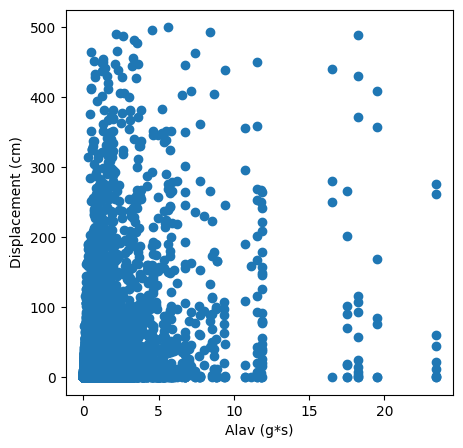

In [7]:
AIav = dfdisp.AIav
fig,ax = plt.subplots(figsize = [5,5])
ax.scatter(dfdisp['AIav'],dfdisp['Disp'])
ax.set_xlabel('Alav (g*s)')
ax.set_ylabel('Displacement (cm)')

### 3 Earthquakes with Most Recordings

In [8]:
eq3 = dfdisp['EQID'].value_counts().nlargest(3).index.tolist()
print(eq3)
dfeq3 = dfdisp[dfdisp['EQID'].isin(eq3)]

[278, 137, 180]


### Correlation Matrix

<AxesSubplot: >

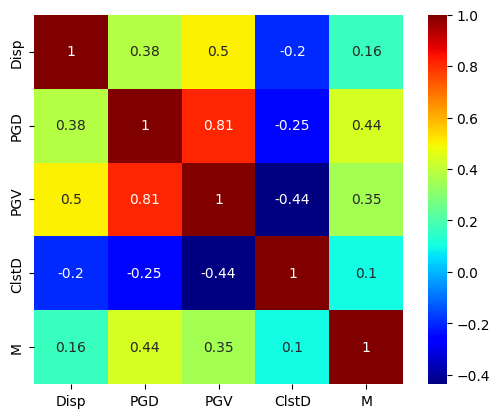

In [9]:
dfSelected = dfdisp[['Disp','PGD','PGV','ClstD','M']]

corr_matrix = dfSelected.corr()
sns.heatmap(data = corr_matrix,square=True,annot=True,cmap="jet")

<AxesSubplot: >

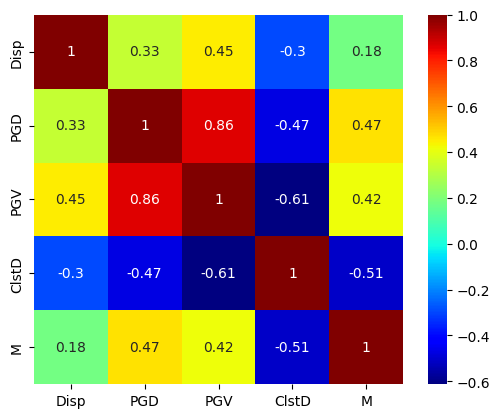

In [10]:
dfSelected = dfeq3[['Disp','PGD','PGV','ClstD','M']]

corr_matrix3 = dfSelected.corr()
sns.heatmap(data = corr_matrix3,square=True,annot=True,cmap="jet")

<AxesSubplot: >

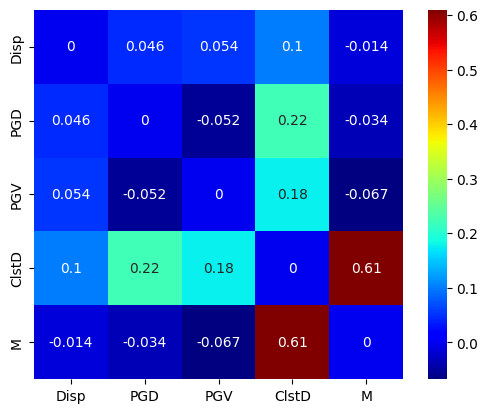

In [11]:
corrmat = corr_matrix - corr_matrix3
sns.heatmap(data = corrmat,square=True,annot=True,cmap="jet")

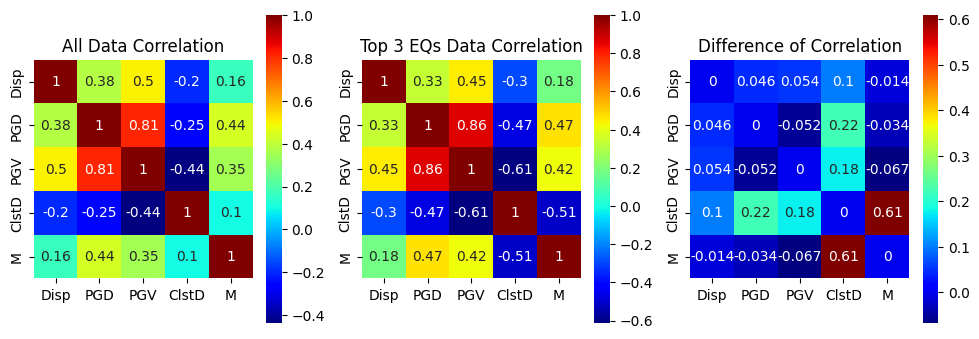

In [12]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))
sns.heatmap(corr_matrix, square=True,annot=True,cmap="jet", ax = axs[0])
sns.heatmap(corr_matrix3, square=True,annot=True,cmap="jet", ax = axs[1])
sns.heatmap(corrmat, square=True,annot=True,cmap="jet", ax = axs[2])

axs[0].set_title('All Data Correlation')
axs[1].set_title('Top 3 EQs Data Correlation')
axs[2].set_title('Difference of Correlation')

plt.show()

### 3 A) Displacement Histogram

(0.0, 500.0)

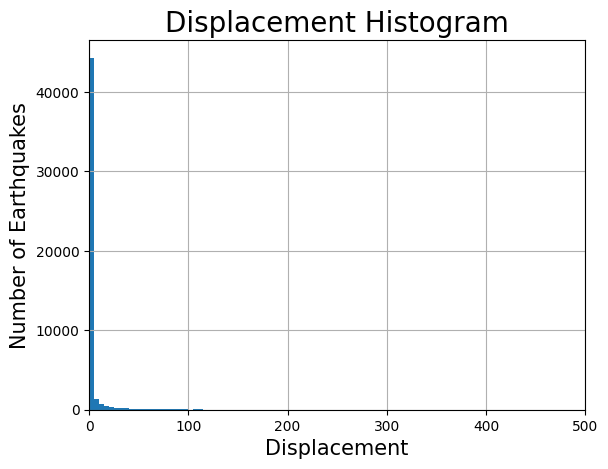

In [13]:
hist_disp = dfdisp.Disp.hist(bins=100)
plt.xlabel("Displacement", fontsize=15)
plt.ylabel("Number of Earthquakes", fontsize = 15)
plt.title("Displacement Histogram",fontsize=20)
plt.xlim([0,500])

### 3 B) Landslide Features Histogram

(0.0, 300.0)

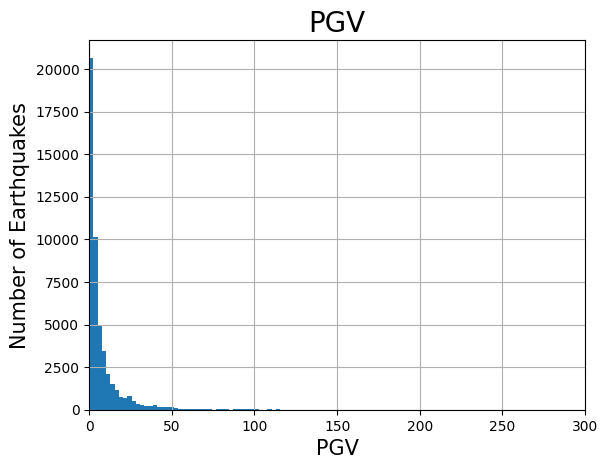

In [14]:
hist_pgv = dfdisp.PGV.hist(bins=100)
plt.xlabel("PGV", fontsize=15)
plt.ylabel("Number of Earthquakes", fontsize = 15)
plt.title("PGV",fontsize=20)
plt.xlim([0,300])

(0.0, 400.0)

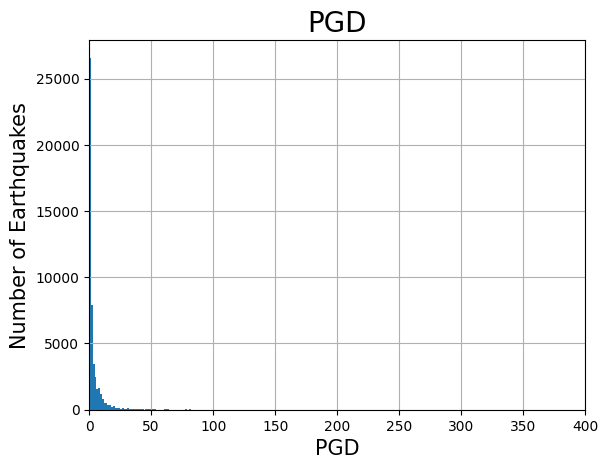

In [15]:
hist_pgd = dfdisp.PGD.hist(bins=250)
plt.xlabel("PGD", fontsize=15)
plt.ylabel("Number of Earthquakes", fontsize = 15)
plt.title("PGD",fontsize=20)
plt.xlim([0,400])

### 3 C) Earthquake Properties Histogram

Text(0, 0.5, 'Number of Earthquakes')

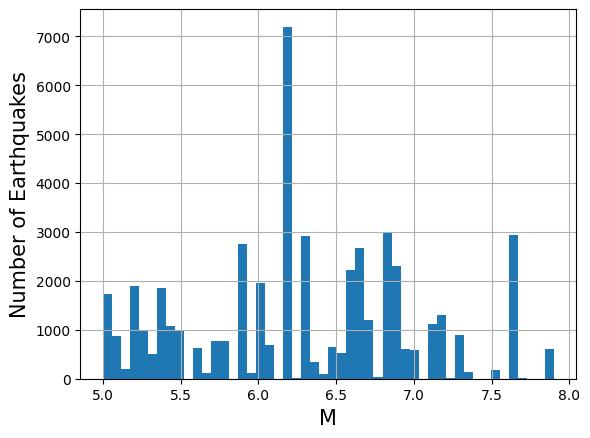

In [16]:
hist_m = dfdisp.M.hist(bins=50)
plt.xlabel("M", fontsize=15)
plt.ylabel("Number of Earthquakes", fontsize = 15)

(0.0, 200.0)

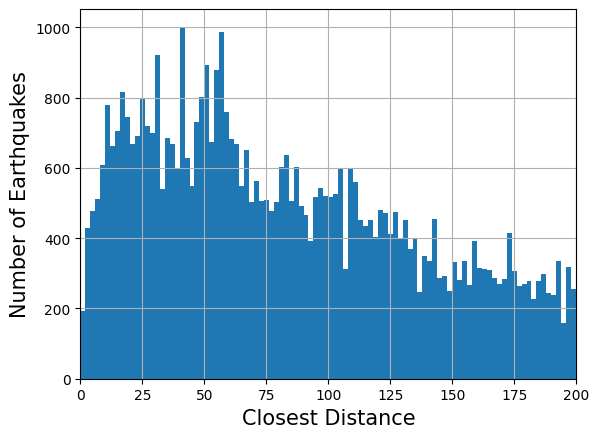

In [17]:
hist_cistd = dfdisp.ClstD.hist(bins=100)
plt.xlabel("Closest Distance", fontsize=15)
plt.ylabel("Number of Earthquakes", fontsize = 15)
plt.xlim([0,200])

### 3 D) Earthquake Signals Histogram

T0010-10000s, and Sa15-Sa30

### Pairplot

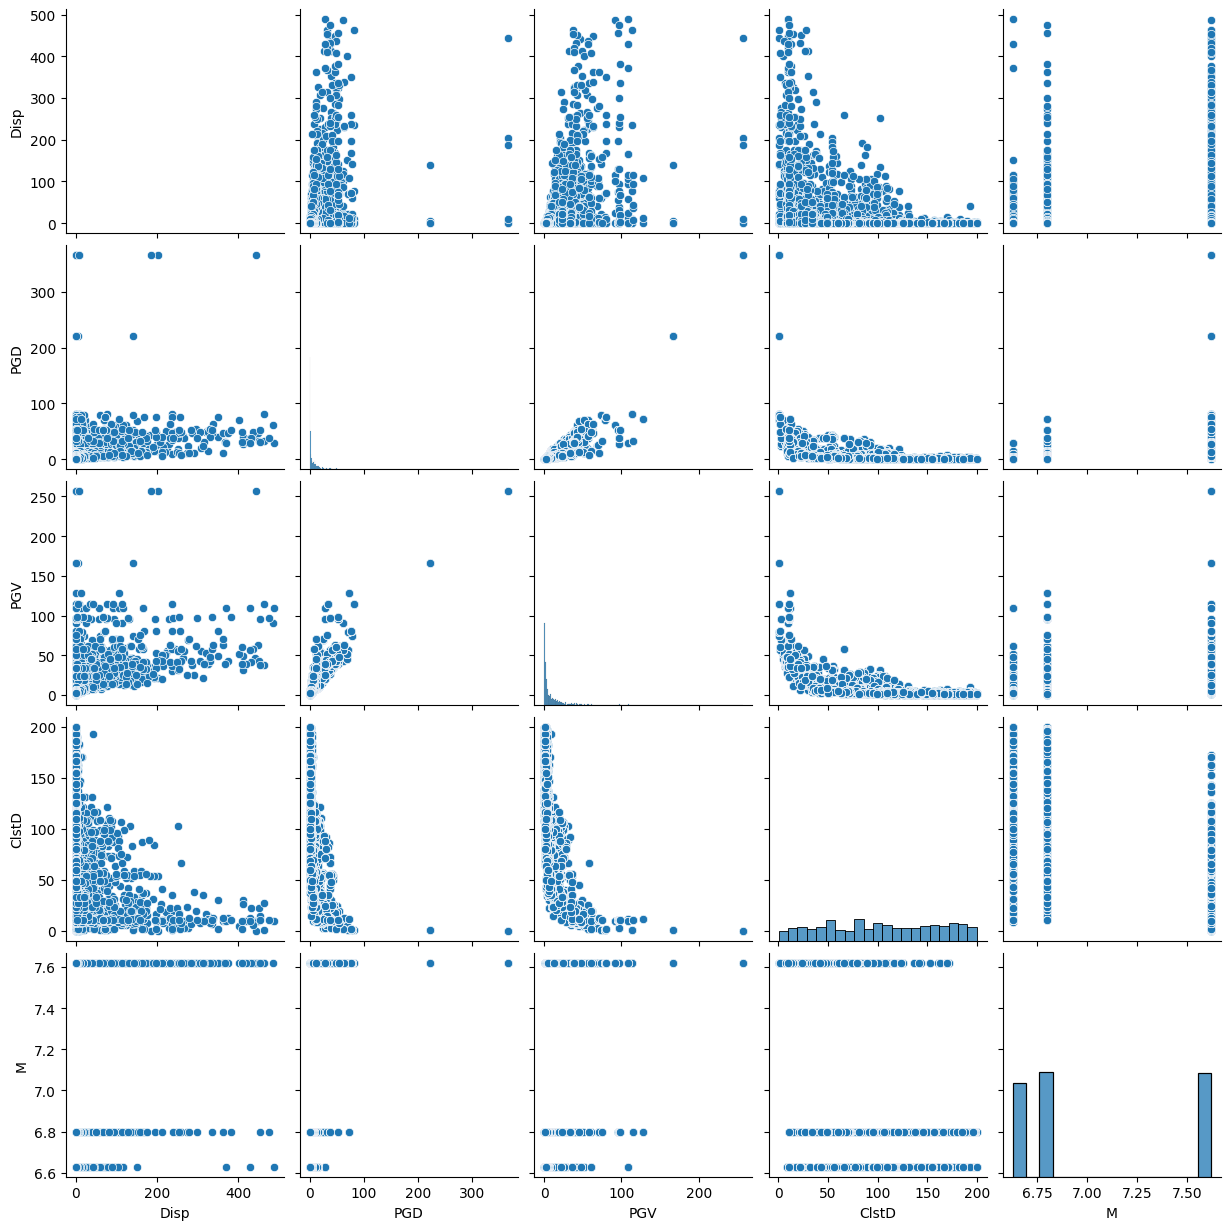

In [18]:
sns.pairplot(data=dfSelected)

# Part A Feature Selection

### Imports

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from IPython.display import Image
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Forwards stepwise regression

In [20]:
# read earthquake data from file in current directory
earthquakeData = pd.read_csv('disp_data.csv')

# selecting 10 spectral acceleration values along with other earthquake features to minimize backwards selection time
earthquakeData = earthquakeData[['KY1','T','durav','AIav','M','ClstD','vs30','PGA','PGV','PGD','T0010S','T0020S','T0050S','T0070S','T0100S','T0200S','T0300S','T0400S','sa15','sa20','sa25','sa30','sa13','sa14','sa16','sa17','sa18','sa10','sa11','sa12','Disp']]

earthquakeData = earthquakeData[earthquakeData['Disp']>0] # need to drop zeroes columns before doing log transformation

earthquakeData_log=np.log(earthquakeData.drop(columns=['T','M']))
earthquakeData_log['T']=earthquakeData['T']
earthquakeData_log['M']=earthquakeData['M']

# perform forwards feature selection to find best features for estimating displacement
y = np.log(earthquakeData['Disp'].to_numpy())
X = earthquakeData_log.drop(columns='Disp')
sfs = SFS(                              # selects one predictor at a time to create a model
    estimator = LinearRegression(),     # uses linear regression model
    k_features=10,                      # maximum size of key features
    forward=True,                       # forward stepwise regression (keep adding features, false removes features one at a time)
    scoring="r2"                        # rates effectiveness of predictors using r-squared value
)
sfs.fit(X,y)

res = pd.DataFrame.from_dict(sfs.get_metric_dict()).T   # visualizes results in a pandas dataframe
res

feature_idx  \
1                                   (6,)   
2                                 (0, 6)   
3                             (0, 6, 25)   
4                         (0, 6, 25, 28)   
5                      (0, 1, 6, 25, 28)   
6                  (0, 1, 6, 25, 27, 28)   
7              (0, 1, 6, 12, 25, 27, 28)   
8           (0, 1, 2, 6, 12, 25, 27, 28)   
9       (0, 1, 2, 6, 12, 19, 25, 27, 28)   
10  (0, 1, 2, 6, 10, 12, 19, 25, 27, 28)   

                                            cv_scores avg_score  \
1   [0.20489494536481467, 0.24264296502640315, 0.2...  0.286685   
2   [0.5941216887740215, 0.602283984875017, 0.4908...   0.57964   
3   [0.7127837139566019, 0.7457091707166064, 0.697...  0.737954   
4   [0.7146326335482784, 0.746003846818968, 0.7185...   0.74549   
5   [0.7315943460573489, 0.7563501096193452, 0.722...  0.753624   
6   [0.7360995246967417, 0.7598322320958666, 0.726...  0.756655   
7   [0.7357929068380697, 0.7627402467323613, 0.729...  0.759108   
8   [0.7414077971854564, 0.7683540799007079, 0.733...  0.763567   
9   [0.7429717813918642, 0.7708758322773576, 0.736...  0.765702   
10  [0.7443258309178346, 0.7711337566229365, 0.735...  0.766533   

                                        feature_names  ci_bound   std_dev  \
1                                              (PGV,)  0.122792  0.095536   
2                                          (KY1, PGV)  0.061132  0.047563   
3                                    (KY1, PGV, sa10)  0.039012  0.030353   
4                                 (KY1, PGV, sa10, T)  0.037306  0.029025   
5                          (KY1, durav, PGV, sa10, T)  0.033324  0.025927   
6                    (KY1, durav, PGV, sa10, sa12, T)  0.031103    0.0242   
7            (KY1, durav, PGV, T0100S, sa10, sa12, T)  0.031513  0.024519   
8      (KY1, durav, AIav, PGV, T0100S, sa10, sa12, T)  0.031735  0.024691   
9   (KY1, durav, AIav, PGV, T0100S, sa30, sa10, sa...  0.032031  0.024922   
10  (KY1, durav, AIav, PGV, T0050S, T0100S, sa30, ...  0.032591  0.025357   

     std_err  
1   0.047768  
2   0.023781  
3   0.015176  
4   0.014512  
5   0.012964  
6     0.0121  
7   0.012259  
8   0.012345  
9   0.012461  
10  0.012678

Text(0, 0.5, 'r2')

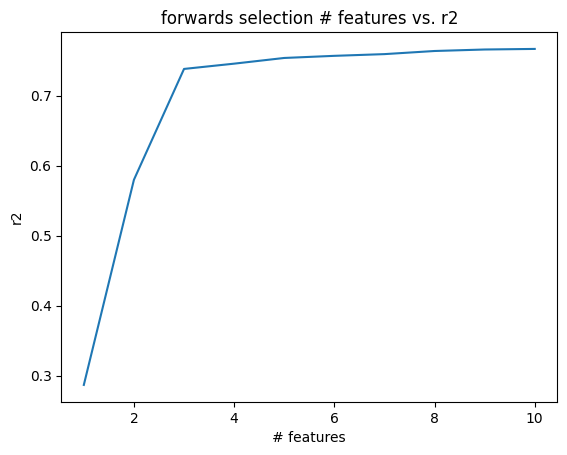

In [21]:
results = plt.plot(res.index, res['avg_score'])
plt.title('forwards selection # features vs. r2')
plt.xlabel('# features')
plt.ylabel('r2')

# increase in r2 has diminishing returns after first 3-4 features
# forwards selection identified KY1, PGV, sa10, T as the 4 most relevant features

### Backwards feature selection

In [22]:
# perform backwards feature selection to find features best for estimating displacement
y = np.log(earthquakeData['Disp'].to_numpy())
X = earthquakeData_log.drop(columns='Disp')
sfs = SFS(                              # selects one predictor at a time to create a model
    estimator = LinearRegression(),     # uses linear regression model
    k_features=1,                       # maximum size of key features
    forward=False,                      # backwards stepwise regression
    scoring="r2"                        # rates effectiveness of predictors using r-squared value
)
sfs.fit(X,y)

resBack = pd.DataFrame.from_dict(sfs.get_metric_dict()).T   # visualizes results in a pandas dataframe
resBack

feature_idx  \
30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
29  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
28  (0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
27  (0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...   
26  (0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...   
25  (0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...   
24  (0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, ...   
23  (0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, ...   
22  (0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 18, ...   
21  (0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 18, 19, ...   
20  (0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 18, 19, ...   
19  (0, 2, 4, 5, 6, 7, 9, 10, 12, 13, 18, 19, 20, ...   
18  (0, 2, 4, 5, 6, 7, 9, 10, 12, 13, 19, 20, 23, ...   
17  (0, 2, 4, 5, 6, 7, 9, 10, 12, 13, 19, 20, 25, ...   
16  (0, 2, 4, 5, 6, 7, 9, 10, 12, 13, 19, 20, 25, ...   
15  (0, 2, 4, 5, 6, 7, 9, 10, 12, 13, 19, 20, 25, ...   
14  (0, 2, 4, 5, 6, 9, 10, 12, 13, 19, 20, 25, 26,...   
13    (0, 2, 4, 5, 6, 10, 12, 13, 19, 20, 25, 26, 28)   
12       (0, 2, 5, 6, 10, 12, 13, 19, 20, 25, 26, 28)   
11           (0, 2, 5, 6, 10, 12, 19, 20, 25, 26, 28)   
10              (0, 2, 6, 10, 12, 19, 20, 25, 26, 28)   
9                   (0, 2, 6, 10, 12, 19, 20, 25, 28)   
8                       (0, 2, 6, 10, 19, 20, 25, 28)   
7                           (0, 2, 6, 10, 19, 20, 25)   
6                               (0, 2, 6, 10, 19, 25)   
5                                   (0, 2, 6, 10, 25)   
4                                      (0, 6, 10, 25)   
3                                          (0, 6, 25)   
2                                             (0, 25)   
1                                               (25,)   

                                            cv_scores avg_score  \
30  [0.7450005930123944, 0.7710671890466383, 0.737...  0.767065   
29  [0.7450002817145098, 0.7713496767689245, 0.737...  0.767168   
28  [0.7450865281497261, 0.7714559178727255, 0.737...  0.767272   
27  [0.7450849234038266, 0.771495390978328, 0.7374...  0.767329   
26  [0.7450884685242772, 0.7714792542220038, 0.737...  0.767387   
25  [0.7450907836134188, 0.7715704953198248, 0.737...  0.767443   
24  [0.7453337261267621, 0.7719492593248275, 0.737...  0.767467   
23  [0.7452379131341554, 0.7718547334953477, 0.737...  0.767496   
22  [0.7452452523801091, 0.7719090121832257, 0.737...  0.767513   
21  [0.7452338335250661, 0.7719049087076273, 0.737...  0.767524   
20  [0.7452449693951124, 0.7719023459115687, 0.737...  0.767542   
19  [0.7452240971037776, 0.7718902453782888, 0.737...  0.767542   
18  [0.7453675839029287, 0.7718976727681722, 0.737...  0.767528   
17  [0.7452478509272776, 0.7718444674673138, 0.737...  0.767524   
16  [0.7451932755541271, 0.7717500383825513, 0.737...  0.767514   
15  [0.7449636286136805, 0.7715283067192436, 0.737...  0.767474   
14  [0.7450933651068632, 0.7716407046941911, 0.737...  0.767452   
13  [0.7452599158408196, 0.771481943497942, 0.7371...  0.767372   
12  [0.7448378921435281, 0.771752917813782, 0.7373...  0.767239   
11  [0.7450299198010448, 0.7709350434792095, 0.736...  0.766963   
10  [0.7450115356361291, 0.7710203161003912, 0.736...  0.766926   
9   [0.744910423714028, 0.7704637765056679, 0.7357...  0.766587   
8   [0.7446195638944841, 0.7691438468084704, 0.733...  0.765728   
7   [0.7444452070306664, 0.7687353764831064, 0.727...  0.763447   
6   [0.7381615209896054, 0.7645203523187198, 0.722...  0.759075   
5   [0.7346587211888436, 0.7626846380353846, 0.704...   0.75184   
4   [0.7180703724036086, 0.7531009568794461, 0.699...  0.742088   
3   [0.7127837139566019, 0.7457091707166064, 0.697...  0.737954   
2   [0.6479349124907168, 0.6209952559543752, 0.664...  0.656814   
1   [0.14417890770942543, 0.1450106257330872, 0.20...  0.228566   

                                        feature_names  ci_bound   std_dev  \
30  (KY1, durav, AIav, ClstD, vs30, PGA, PGV, PGD,...  0.031879  0.024803   
29  (KY1, durav, AIav, vs30, PGA, PGV, PGD

Text(0, 0.5, 'r2')

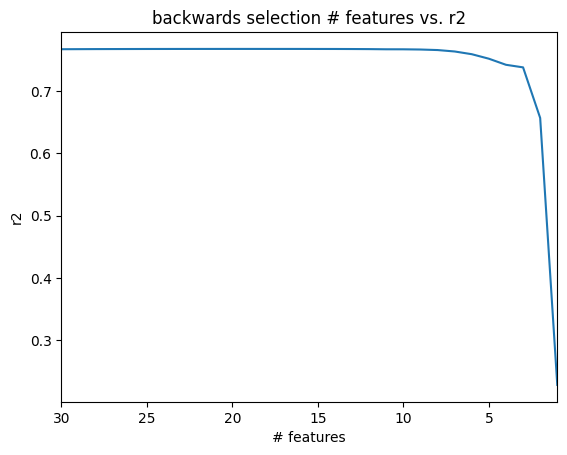

In [23]:
resultsBack = plt.plot(resBack.index, resBack['avg_score'])
plt.xlim(max(resBack.index), min(resBack.index))
plt.title('backwards selection # features vs. r2')
plt.xlabel('# features')
plt.ylabel('r2')

# r2 decreases significantly once the last 3-4 features are removed
# backwards selection identified KY1, PGV, T0050S, sa10 as the 4 most relevant features

### LASSO feature selection

In [24]:
# create training and test sets
earthquakeTraining, earthquakeTest = train_test_split(earthquakeData, test_size=0.20, random_state=770)

X_train = earthquakeTraining.drop(columns='Disp').to_numpy()
y_train = earthquakeTraining['Disp'].to_numpy()
X_test = earthquakeTest.drop(columns='Disp').to_numpy()
y_test = earthquakeTest['Disp'].to_numpy()

# create list of lambda values
lambda_values = np.logspace(-2,2,50) # create a list of candidate lambda from 10^-2 to 10^2 with 50 points in between
print(lambda_values)

# want to identify nonzero coefficients,
# standardize input X to ensure coefficients are in same scale
scaler=StandardScaler() # creates scaler for standardization
X_train_standardized = scaler.fit_transform(X_train)

# Initialize a Lasso Regression model with cross-validation
modelLASSO = LassoCV(alphas=lambda_values,cv=10, max_iter=10000) # performs 10-fold cross-validation

# Fit the model on the training set
modelLASSO.fit(X_train_standardized, y_train)

# Predict on the testing set
X_test_standardized = scaler.transform(X_test)
y_pred = modelLASSO.predict(X_test_standardized)

# get error
mse = mean_squared_error(y_pred,y_test)
print('MSE is', mse)
# check the coefficients
print('intercept is:', modelLASSO.intercept_)
earthquakeData_features = ['KY1','T','durav','AIav','M','ClstD','vs30','PGA','PGV','PGD','T0010S','T0020S','T0050S','T0070S','T0100S','T0200S','T0300S','T0400S','sa15','sa20','sa25','sa30','sa13','sa14','sa16','sa17','sa18','sa10','sa11','sa12','Disp']
print('coefficients are:', list(zip(modelLASSO.coef_, earthquakeData_features)))

# find optimal alpha/lambda value
print('optimal lambda is', modelLASSO.alpha_)

[1.00000000e-02 1.20679264e-02 1.45634848e-02 1.75751062e-02
 2.12095089e-02 2.55954792e-02 3.08884360e-02 3.72759372e-02
 4.49843267e-02 5.42867544e-02 6.55128557e-02 7.90604321e-02
 9.54095476e-02 1.15139540e-01 1.38949549e-01 1.67683294e-01
 2.02358965e-01 2.44205309e-01 2.94705170e-01 3.55648031e-01
 4.29193426e-01 5.17947468e-01 6.25055193e-01 7.54312006e-01
 9.10298178e-01 1.09854114e+00 1.32571137e+00 1.59985872e+00
 1.93069773e+00 2.32995181e+00 2.81176870e+00 3.39322177e+00
 4.09491506e+00 4.94171336e+00 5.96362332e+00 7.19685673e+00
 8.68511374e+00 1.04811313e+01 1.26485522e+01 1.52641797e+01
 1.84206997e+01 2.22299648e+01 2.68269580e+01 3.23745754e+01
 3.90693994e+01 4.71486636e+01 5.68986603e+01 6.86648845e+01
 8.28642773e+01 1.00000000e+02]
MSE is 1294.729236190965
intercept is: 16.600544628457747
coefficients are: [(-22.166971921293182, 'KY1'), (1.3865361436706953, 'T'), (0.5845205061725005, 'durav'), (3.3637314705252916, 'AIav'), (3.0773289924452296, 'M'), (-3.6071626303

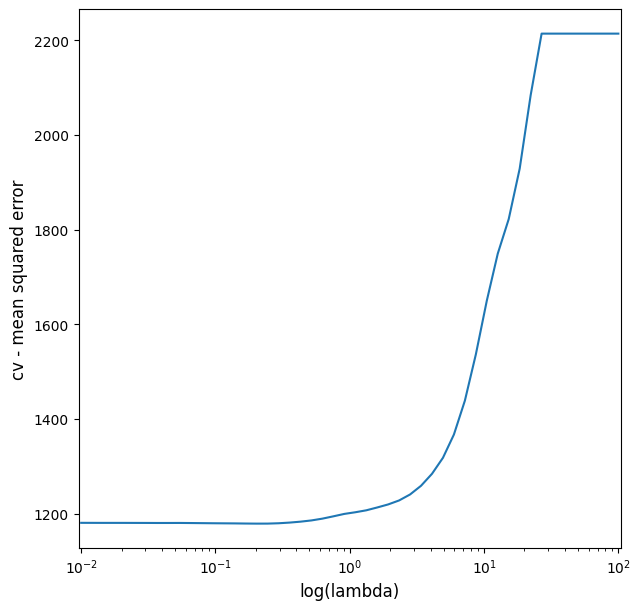

In [25]:
# plot lambdas
fig,ax=plt.subplots(figsize=(7,7))
ax.plot(modelLASSO.alphas_, np.mean(modelLASSO.mse_path_,axis=1))
ax.set_xscale('log')
ax.set_xlabel('log(lambda)', fontsize=12)
ax.set_ylabel('cv - mean squared error', fontsize=12)
ax.margins(x=0.005)

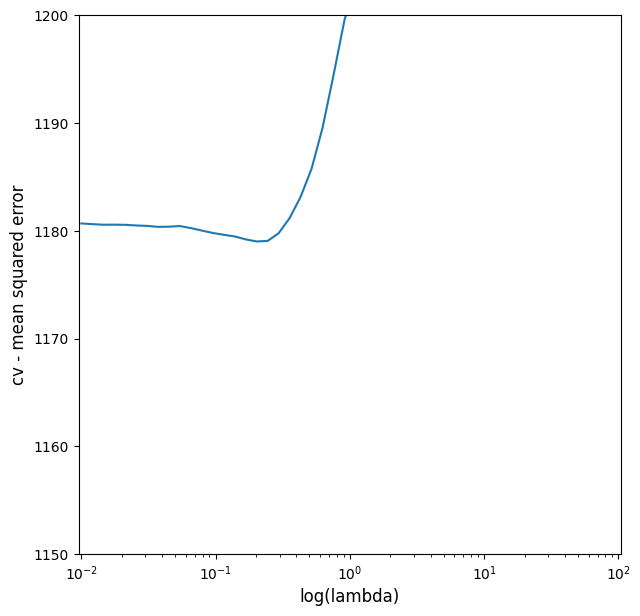

In [26]:
# zoom in on absolute minimum
fig,ax=plt.subplots(figsize=(7,7))
ax.plot(modelLASSO.alphas_, np.mean(modelLASSO.mse_path_,axis=1))
ax.set_xscale('log')
ax.set_xlabel('log(lambda)', fontsize=12)
ax.set_ylabel('cv - mean squared error',fontsize=12)
ax.set_ybound(1150, 1200)
ax.set_xbound(0.01, 10)
ax.margins(x=0.005)

# Part A Regression Models

### Imports

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import Image

# read earthquake data set
earthquake = pd.read_csv('disp_data.csv')

### Logistic regression

In [28]:
# dispVar = 1 if displacement greater than 1 cm occurs, 0 otherwise
dispVar = (earthquake['Disp'] > 1).astype('int64')
earthquake = earthquake.assign(dispVar = dispVar)

# create training and test sets; training set uses 80% of the data
earthquakeTraining, earthquakeTest = train_test_split(earthquake, test_size=0.20, random_state=404)

# create training and test variables using the 5 most relevant features identified from forwards/backwards selection
X_train = earthquakeTraining[['KY1', 'PGV', 'T0050S', 'sa10', 'T']]
y_train = earthquakeTraining['dispVar']
X_test = earthquakeTest[['KY1', 'PGV', 'T0050S', 'sa10', 'T']]
y_test = earthquakeTest['dispVar']

# perform log transformation on training and test sets, except on columns containing zero or negative values
X_train_log=np.log(X_train.drop(columns=['T', 'KY1']))
X_test_log=np.log(X_test.drop(columns=['T','KY1']))

# add back in columns that cannot be log transformed
X_train_log[['T','KY1']]=X_train[['T','KY1']]
X_test_log[['T', 'KY1']]=X_test[['T', 'KY1']]
print(X_train_log)

            PGV    T0050S      sa10        T    KY1
8136   1.396962 -3.405145 -2.324657  0.19783  0.250
31194  0.411977 -4.623232 -3.789938  0.19978  0.075
522    4.503149  0.524610  0.746783  0.49892  0.150
6654   2.040597 -2.310224 -1.682493  0.10000  0.200
13627 -0.796377 -4.729487 -6.142241  2.00060  0.075
...         ...       ...       ...      ...    ...
38799 -0.835702 -3.940834 -5.385227  0.30203  0.250
37876  0.361444 -4.078019 -3.325404  0.69675  0.300
14186  1.132208 -3.759216 -3.515498  0.19783  0.035
5884   2.586184 -3.147602 -2.838147  0.10000  0.020
7911   0.291251 -3.695300 -2.846830  0.30136  0.050

[39602 rows x 5 columns]


In [29]:
# Perform logistic regression using these features to classify cases between "displacement" and "no displacement"
earthquakeLR = LogisticRegression(solver='lbfgs', max_iter=500)
earthquakeLR.fit(X_train_log, y_train)              # uses training data to fit regression
y_lrPred_train = earthquakeLR.predict(X_train_log)  # predicts y from training data of x
y_lrPred_test = earthquakeLR.predict(X_test_log)

# get test error
lrTrain_acc = metrics.accuracy_score(y_train, y_lrPred_train)
lrTrain_error = 1 - lrTrain_acc
lrTest_acc = metrics.accuracy_score(y_test, y_lrPred_test)
lrTest_error = 1 - lrTest_acc
print('Logistic regression training error is', lrTrain_error)
print('Logistic regression test error is', lrTest_error)

print(earthquakeLR.classes_)
print(earthquakeLR.intercept_)
print(earthquakeLR.coef_)

Logistic regression training error is 0.05057825362355439
Logistic regression test error is 0.04625795374204622
[0 1]
[3.93104208]
[[  1.04710411  -0.19771333   2.25697531   0.34875998 -27.86453327]]


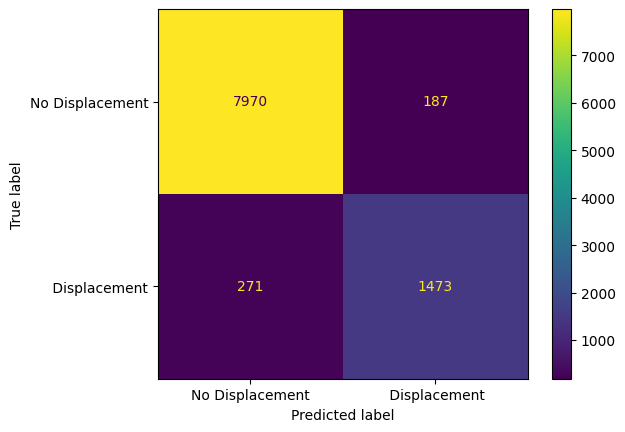

In [30]:
cm = sk.metrics.confusion_matrix(y_test, y_lrPred_test)
plot = sk.metrics.ConfusionMatrixDisplay(cm, display_labels=['No Displacement', ' Displacement'])
plot.plot()

# dispVar = 1 if displacement occurs, 0 otherwise
# plot y axis prob of 0 displacement, x axis = different features

### Multilinear regression

In [31]:
# as multilinear regression is meant to predict displacement value when it occurs,
# we only train and test the model on nonzero displacement values
earthquakeTrainingNZ = earthquakeTraining[earthquakeTraining['Disp'] >= 1]
earthquakeTestNZ = earthquakeTest[earthquakeTest['Disp'] >= 1]

X_trainML = earthquakeTrainingNZ[['KY1', 'PGV', 'T0050S', 'sa10', 'T']]
y_trainML = earthquakeTrainingNZ['Disp']
X_testML = earthquakeTestNZ[['KY1', 'PGV', 'T0050S', 'sa10', 'T']]
y_testML = earthquakeTestNZ['Disp']

# perform log transformation on training and test sets, except on columns containing zero or negative values
X_trainML_log=np.log(X_trainML.drop(columns=['T', 'KY1']))
X_testML_log=np.log(X_testML.drop(columns=['T','KY1']))
y_trainML_log = np.log(y_trainML)
y_testML_log = np.log(y_testML)

# add back in columns that cannot be log transformed
X_trainML_log[['T','KY1']]=X_trainML[['T','KY1']]
X_testML_log[['T', 'KY1']]=X_testML[['T', 'KY1']]

# add a constant to training and test sets
X_trainML_log = sm.add_constant(X_trainML_log) # adding a constant
X_testML_log = sm.add_constant(X_testML_log) # adding a constant

mlModel = sm.OLS(y_trainML_log, X_trainML_log).fit()

print(mlModel.summary())

                            OLS Regression Results                            
Dep. Variable:                   Disp   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     2738.
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        18:09:19   Log-Likelihood:                -8643.2
No. Observations:                6872   AIC:                         1.730e+04
Df Residuals:                    6866   BIC:                         1.734e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5260      0.070      7.558      0.0

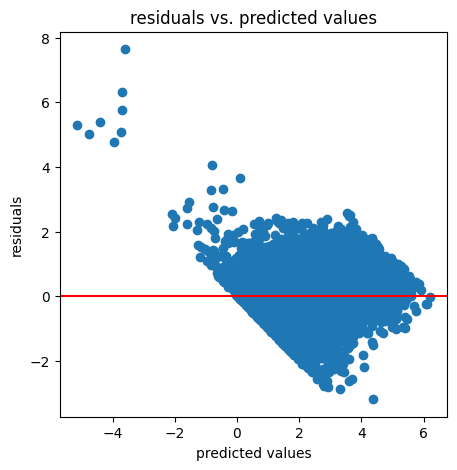

In [32]:
# residual plots for multilinear regression
mlPrediction = mlModel.predict(X_trainML_log)    # predict displacement using training set
mlPrediction_test = mlModel.predict(X_testML_log)    # predict displacement using test set

residuals=mlModel.resid
                     
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(mlPrediction,residuals)
ax.set_title('residuals vs. predicted values')
ax.set_xlabel('predicted values')
ax.set_ylabel('residuals')
ax.axhline(y=0,color='r')
# this plot is indicative of heteroskedasticity; standard dev increases as displacement increases

### Single Variable Residual Plots

Text(0, 0.5, 'residuals')

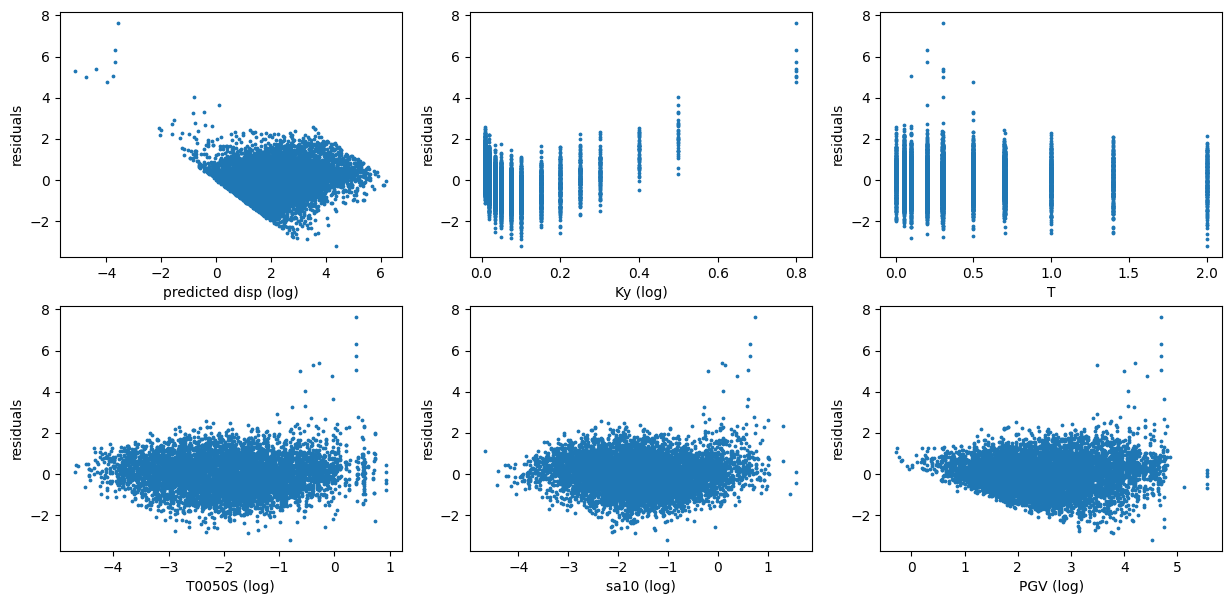

In [33]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,7))
ax[0,0].scatter(mlPrediction,residuals ,s=3)
ax[0,0].set_xlabel('predicted disp (log)')
ax[0,0].set_ylabel('residuals')

ax[0,1].scatter(X_trainML_log['KY1'],residuals ,s=3)
ax[0,1].set_xlabel('Ky (log)')
ax[0,1].set_ylabel('residuals')

ax[0,2].scatter(X_trainML_log['T'],residuals ,s=3)
ax[0,2].set_xlabel('T')
ax[0,2].set_ylabel('residuals')

ax[1,0].scatter(X_trainML_log['T0050S'],residuals ,s=3)
ax[1,0].set_xlabel('T0050S (log)')
ax[1,0].set_ylabel('residuals')

ax[1,1].scatter(X_trainML_log['sa10'],residuals ,s=3)
ax[1,1].set_xlabel('sa10 (log)')
ax[1,1].set_ylabel('residuals')

ax[1,2].scatter(X_trainML_log['PGV'],residuals ,s=3)
ax[1,2].set_xlabel('PGV (log)')
ax[1,2].set_ylabel('residuals')

Text(0, 0.5, 'residuals')

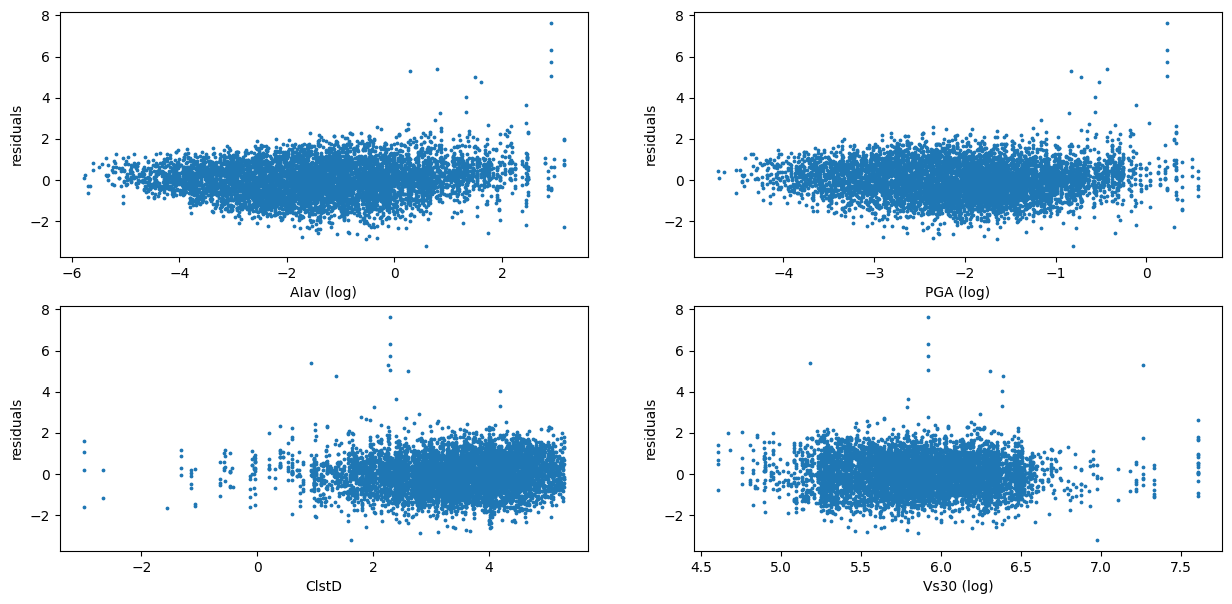

In [34]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,7))
ax[0,0].scatter(np.log(earthquakeTrainingNZ['AIav']),residuals ,s=3)
ax[0,0].set_xlabel('AIav (log)')
ax[0,0].set_ylabel('residuals')

ax[0,1].scatter(np.log(earthquakeTrainingNZ['PGA']),residuals ,s=3)
ax[0,1].set_xlabel('PGA (log)')
ax[0,1].set_ylabel('residuals')

ax[1,0].scatter(np.log(earthquakeTrainingNZ['ClstD']),residuals ,s=3)
ax[1,0].set_xlabel('ClstD')
ax[1,0].set_ylabel('residuals')

ax[1,1].scatter(np.log(earthquakeTrainingNZ['vs30']),residuals ,s=3)
ax[1,1].set_xlabel('Vs30 (log)')
ax[1,1].set_ylabel('residuals')

### Nonlinear Model

In [35]:
model = LinearRegression()
X_nl_train = earthquakeTrainingNZ[['KY1', 'PGV', 'M', 'sa10', 'T', 'T1300S', 'T1500S', 'T1000S']]
y_nl_train = earthquakeTrainingNZ['Disp']
X_nl_test = earthquakeTestNZ[['KY1', 'PGV', 'M', 'sa10', 'T', 'T1300S', 'T1500S', 'T1000S']]
y_nl_test = earthquakeTestNZ['Disp']

X_train_nl_log=np.log(X_nl_train.drop(columns=['T', 'M', 'T1300S','T1500S', 'T1000S']))
X_test_nl_log=np.log(X_nl_test.drop(columns=['T','M', 'T1300S', 'T1500S', 'T1000S']))
y_train_nl_log = np.log(y_nl_train)
y_test_nl_log = np.log(y_nl_test)

# add back in columns that cannot be log transformed
X_train_nl_log[['T','M', 'T1300S', 'T1500S', 'T1000S']]=X_nl_train[['T','M', 'T1300S', 'T1500S', 'T1000S']]
X_test_nl_log[['T', 'M', 'T1300S', 'T1500S', 'T1000S']]=X_nl_test[['T', 'M', 'T1300S', 'T1500S', 'T1000S']]
    
polyX = np.vstack([X_train_nl_log['KY1'], X_train_nl_log['KY1']**2, X_train_nl_log['KY1']*X_train_nl_log['sa10']*X_train_nl_log['T1300S'], X_train_nl_log['sa10']*X_train_nl_log['T1300S'], (X_train_nl_log['sa10']*X_train_nl_log['T1500S'])**2, X_train_nl_log['T1000S'], X_train_nl_log['T1000S']**2, X_train_nl_log['M'], X_train_nl_log['PGV']]).T 
model.fit(polyX, y_train_nl_log)
X_train_nl_log = sm.add_constant(X_train_nl_log) 
polyX = sm.add_constant(polyX) 
X_test_nl_log = sm.add_constant(X_test_nl_log)
nlPrediction = model.predict(X_train_nl_log)
nlPrediction_test = model.predict(X_test_nl_log)
nlModel = sm.OLS(y_train_nl_log, polyX).fit()
residuals= nlModel.resid
nlPrediction = model.predict(X_train_nl_log)
alsoResiduals = y_train_nl_log - nlPrediction
testResiduals = y_test_nl_log - nlPrediction_test
print(nlModel.summary())

                            OLS Regression Results                            
Dep. Variable:                   Disp   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     2885.
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        18:09:23   Log-Likelihood:                -7032.6
No. Observations:                6872   AIC:                         1.409e+04
Df Residuals:                    6862   BIC:                         1.415e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4623      0.119    -62.717      0.0

c:\Users\Holt Leach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Holt Leach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Holt Leach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


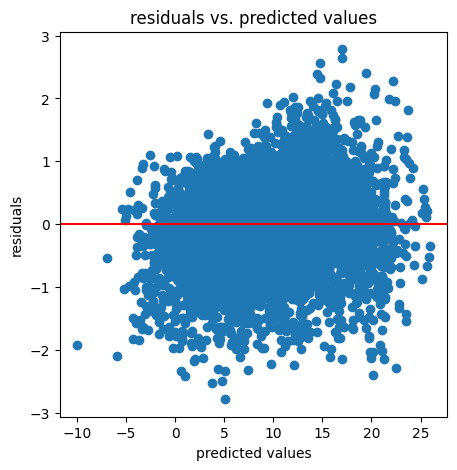

In [36]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(nlPrediction,residuals)
ax.set_title('residuals vs. predicted values')
ax.set_xlabel('predicted values')
ax.set_ylabel('residuals')
ax.axhline(y=0,color='r')

### Logistic regression classification report

In [37]:
print('LR Training Classification Report:\n', sk.metrics.classification_report(y_train, y_lrPred_train)) # gives the prediction accuracy of model
print('LR Test Classification Report:\n', sk.metrics.classification_report(y_test, y_lrPred_test)) # gives the prediction accuracy of model
# f1 is mean of precision & recall, shows accuracy in predicting that classifier's ability to classify data in that class compared to other classes
# precision = how many retreived items are relevant = true pos/all retreived elements
# recall = how many relevant items are retreived = true pos/total pos
# f1 score = measures accuracy of the test/classifier

LR Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     32730
           1       0.88      0.82      0.85      6872

    accuracy                           0.95     39602
   macro avg       0.92      0.90      0.91     39602
weighted avg       0.95      0.95      0.95     39602

LR Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      8157
           1       0.89      0.84      0.87      1744

    accuracy                           0.95      9901
   macro avg       0.93      0.91      0.92      9901
weighted avg       0.95      0.95      0.95      9901



### Prediction of additional scenarios

In [38]:
scenario1 = pd.read_csv('scenario1_additional-3.csv')
scenario2 = pd.read_csv('scenario2_additional-3.csv')

X_train1 = scenario1[['T', 'sa10', 'T0050S', 'pgv', 'durav', 'AIav']]
X_train2 = scenario2[['T', 'sa10', 'T0050S', 'pgv', 'durav', 'AIav']]

# perform log transformation except on columns containing zero or negative values
X_train1_log=np.log(X_train1.drop(columns=['T']))
X_train2_log=np.log(X_train2.drop(columns=['T']))

# add back in columns that cannot be log transformed
X_train1_log['T']=X_train1['T']
X_train2_log['T']=X_train2['T']

# add a constant to training and test sets
X_train1_log = sm.add_constant(X_train1_log) # adding a constant
X_train2_log = sm.add_constant(X_train2_log) # adding a constant

# additional predictions
scenario1Predict = mlModel.predict(X_train1_log)
scenario2Predict = mlModel.predict(X_train2_log)

Text(0, 0.5, 'predicted displacement')

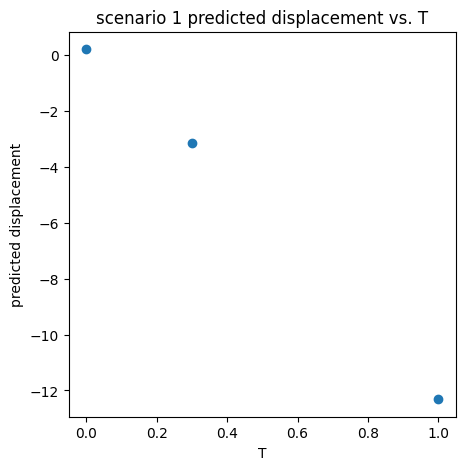

In [39]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(X_train1['T'],scenario1Predict)
ax.set_title('scenario 1 predicted displacement vs. T')
ax.set_xlabel('T')
ax.set_ylabel('predicted displacement')

Text(0, 0.5, 'predicted displacement')

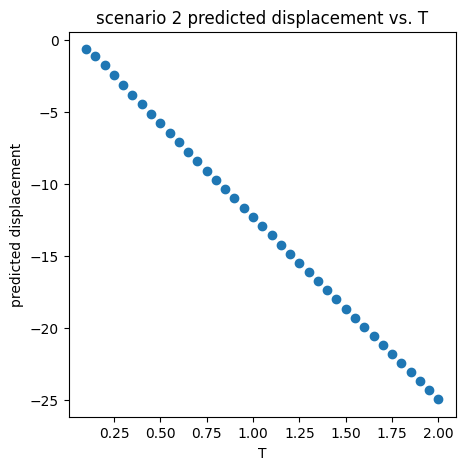

In [40]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(X_train2['T'],scenario2Predict)
ax.set_title('scenario 2 predicted displacement vs. T')
ax.set_xlabel('T')
ax.set_ylabel('predicted displacement')

# Part B EDA

In [41]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
import calendar

In [42]:
LA_monthly = pd.read_csv('Los_Angeles_Monthly.csv') 
SF_monthly = pd.read_csv('San_Francisco_Monthly.csv') 
FP_monthly = pd.read_csv('Fort_Pulaski_Monthly.csv') 
NY_monthly = pd.read_csv('New_York_Monthly.csv') 

lmo = LA_monthly['MSL (m)']
ldt = LA_monthly['Date']
ldt = ldt.apply(pd.to_datetime)

sfmo = SF_monthly['MSL (m)']
sfdt = SF_monthly['Date']
sfdt = sfdt.apply(pd.to_datetime)

fpmo = FP_monthly['MSL (m)']
fpdt = FP_monthly['Date']
fpdt = fpdt.apply(pd.to_datetime)

nymo = NY_monthly['MSL (m)']
nydt = NY_monthly['Date']
nydt = nydt.apply(pd.to_datetime)

Text(0, 0.5, 'Mean Sea Level (m)')

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

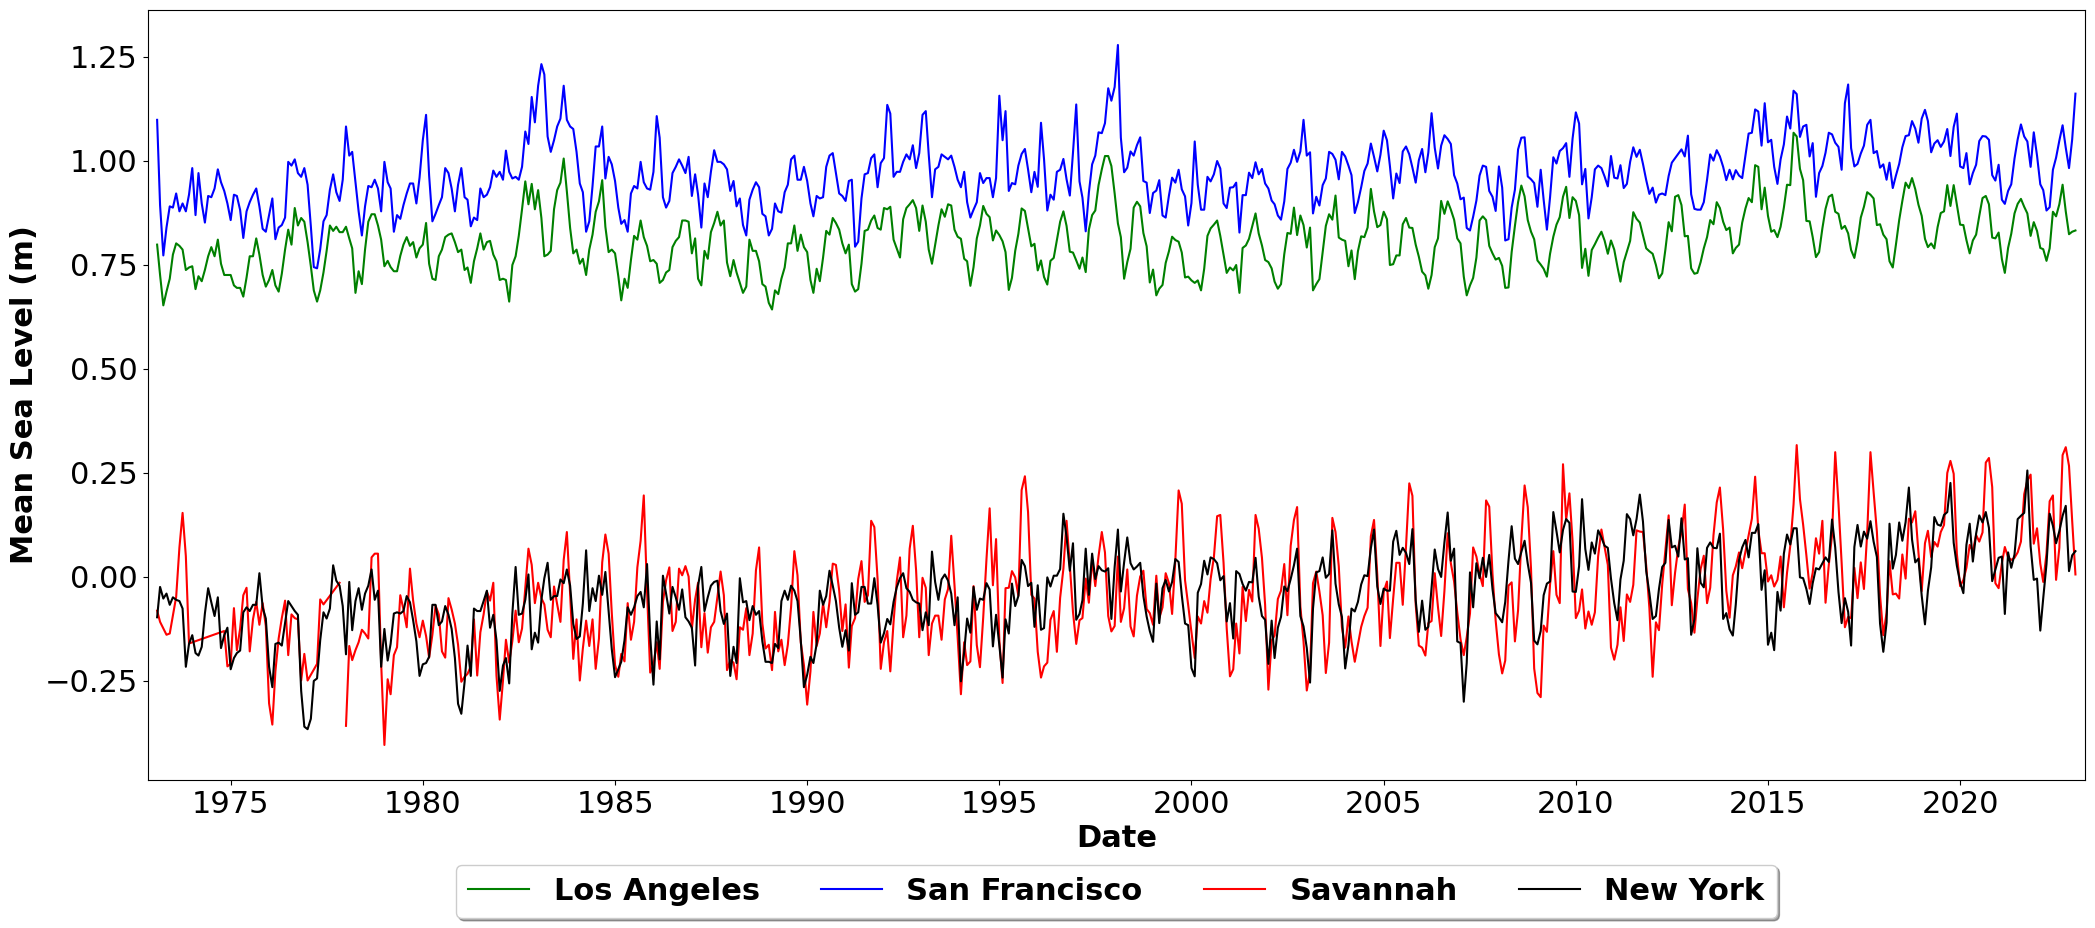

In [43]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(25,10))
plt.plot(ldt, lmo,"-g", label = "Los Angeles")
plt.plot(sfdt, sfmo,"-b", label = "San Francisco")
plt.plot(fpdt, fpmo,"-r", label = "Savannah")
plt.plot(nydt, nymo,"-k", label = "New York")

#format
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09),fancybox=True, shadow=True, ncol=4)
ax.margins(x=0.005)
plt.xticks(ha='center',fontweight='normal')
plt.yticks(fontweight='normal')
ax.set_xlabel('Date',fontweight='bold')
ax.set_ylabel('Mean Sea Level (m)',fontweight='bold')

In [44]:
# # values for table
# avny = NY_monthly["MSL (m)"]
# #NY_monthly.tail(13)
# ny22 = avny[587:599]
# #print(ny22)
# print(ny22.mean())

# avfp = FP_monthly["MSL (m)"]
# #FP_monthly.loc[569:580]
# fp22 = avfp[569:581]
# #print(fp22)
# print(fp22.mean())

# avsf = SF_monthly["MSL (m)"]
# #SF_monthly.loc[585:596]
# sf22 = avsf[585:597]
# #print(sf22)
# print(sf22.mean())

# avla = LA_monthly["MSL (m)"]
# #LA_monthly.loc[587:598]
# la22 = avla[587:599]
# #print(la22)
# print(la22.mean())

# yr73 = av1[0:11]
# print(yr73.mean())

# #extremes and year
# col = "MSL (m)"
# max_x = SF_monthly.loc[SF_monthly[col].idxmax()] #change idxmax-idxmin, city
# print(max_x)

Monthly

In [45]:
#process
FP_monthly = pd.read_csv('Fort_Pulaski_Monthly.csv') 
FP_monthly = FP_monthly[["Date", "MSL (m)"]]
FP_monthly["Date"] = pd.to_datetime(FP_monthly["Date"])
FP_monthly['Month'] = pd.DatetimeIndex(FP_monthly['Date']).month
FP_monthly['Month'] = FP_monthly['Month'].apply(lambda x: calendar.month_abbr[x])
FP_monthly['Year'] = pd.DatetimeIndex(FP_monthly['Date']).year

NY_monthly = pd.read_csv('New_York_Monthly.csv') 
NY_monthly = NY_monthly[["Date", "MSL (m)"]]
NY_monthly["Date"] = pd.to_datetime(NY_monthly["Date"]) 
NY_monthly['Month'] = pd.DatetimeIndex(NY_monthly['Date']).month
NY_monthly['Month'] = NY_monthly['Month'].apply(lambda x: calendar.month_abbr[x])
NY_monthly['Year'] = pd.DatetimeIndex(NY_monthly['Date']).year

LA_monthly = pd.read_csv('Los_Angeles_Monthly.csv') 
LA_monthly = LA_monthly[["Date", "MSL (m)"]]
LA_monthly["Date"] = pd.to_datetime(LA_monthly["Date"])
LA_monthly['Month'] = pd.DatetimeIndex(LA_monthly['Date']).month
LA_monthly['Month'] = LA_monthly['Month'].apply(lambda x: calendar.month_abbr[x])
LA_monthly['Year'] = pd.DatetimeIndex(LA_monthly['Date']).year

SF_monthly = pd.read_csv('San_Francisco_Monthly.csv') 
SF_monthly = SF_monthly[["Date", "MSL (m)"]]
SF_monthly["Date"] = pd.to_datetime(SF_monthly["Date"])
SF_monthly['Month'] = pd.DatetimeIndex(SF_monthly['Date']).month
SF_monthly['Month'] = SF_monthly['Month'].apply(lambda x: calendar.month_abbr[x])
SF_monthly['Year'] = pd.DatetimeIndex(SF_monthly['Date']).year

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

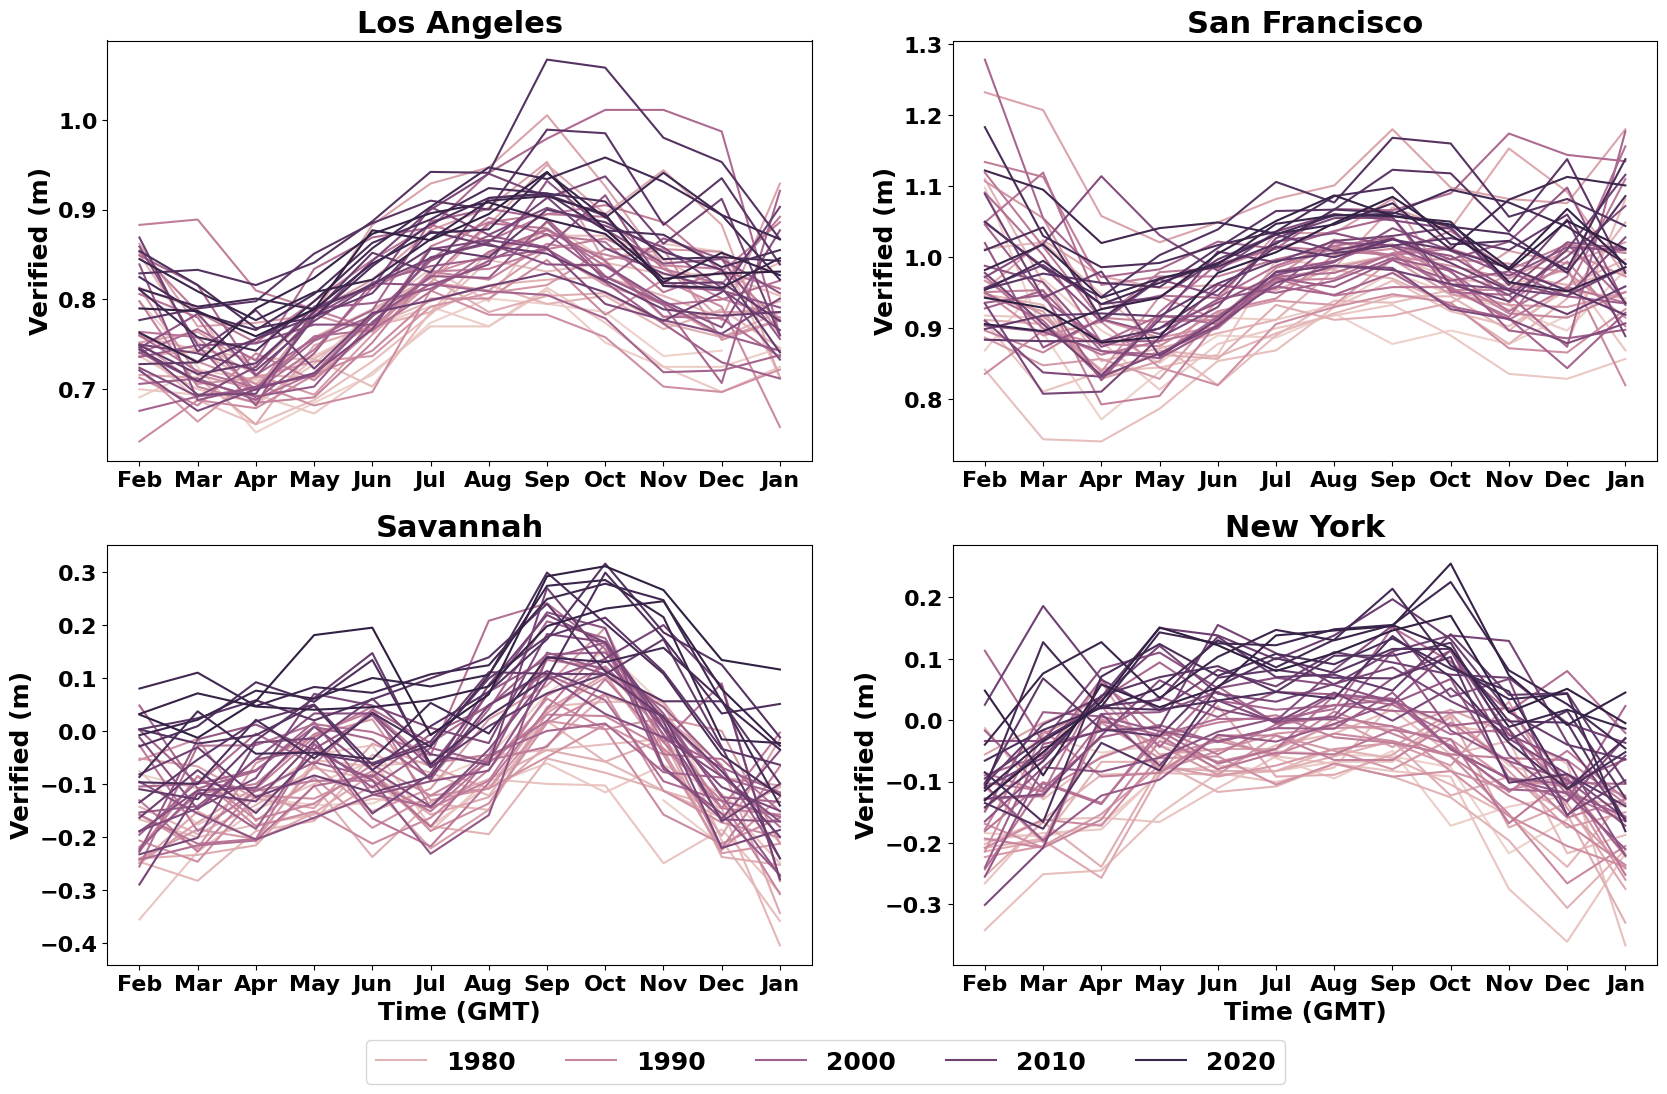

In [46]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))
#generate figures
sns.lineplot(legend = False,data = LA_monthly, x='Month', y='MSL (m)', hue = 'Year',ax=axs[0, 0])
axs[0, 0].set_title("Los Angeles", fontsize=22,fontweight='bold')
axs[0, 0].set_xlabel('')

sns.lineplot(legend = False,data = SF_monthly, x='Month', y='MSL (m)', hue = 'Year', ax=axs[0, 1])
axs[0, 1].set_title('San Francisco', fontsize=22,fontweight='bold')
axs[0, 1].set_xlabel('')

sns.lineplot(data = FP_monthly, x='Month', y='MSL (m)', hue = 'Year', ax=axs[1, 0])
axs[1, 0].set_title('Savannah', fontsize=22,fontweight='bold')
axs[1,0].legend(loc='upper left', bbox_to_anchor=(0.35, -0.15), ncol=5,fontsize=18)
axs[1,0].set_xlabel('Time (GMT)', fontsize=18,fontweight='bold')

sns.lineplot(legend = False,data = NY_monthly, x='Month', y='MSL (m)', hue = 'Year',ax=axs[1, 1])
axs[1, 1].set_title('New York', fontsize=22,fontweight='bold')
axs[1, 1].set_xlabel('Time (GMT)', fontsize=18,fontweight='bold')

# format
for ax in axs.flat:
    ax.set_ylabel('Verified (m)', fontsize=18,fontweight='bold')

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

Hourly

In [47]:
# preprocess
LA_hourly = pd.read_csv('Los_Angeles_Hourly.csv') 
LA_hourly = LA_hourly[["Date","Time (GMT)","Verified (m)"]] 
LA_hourly["Date"] = pd.to_datetime(LA_hourly["Date"])
LA_hourly['Month'] = pd.DatetimeIndex(LA_hourly['Date']).month
LA_hourly['Day'] = pd.DatetimeIndex(LA_hourly['Date']).day
LA_hourly['Month'] = LA_hourly['Month'].apply(lambda x: calendar.month_abbr[x])
LA_hourly.drop(['Date'], axis=1,inplace=True) 

SF_hourly = pd.read_csv('San_Francisco_Hourly.csv') 
SF_hourly = SF_hourly[["Date","Time (GMT)","Verified (m)"]] 
SF_hourly["Date"] = pd.to_datetime(SF_hourly["Date"])
SF_hourly['Month'] = pd.DatetimeIndex(SF_hourly['Date']).month
SF_hourly['Day'] = pd.DatetimeIndex(SF_hourly['Date']).day
SF_hourly['Month'] = SF_hourly['Month'].apply(lambda x: calendar.month_abbr[x])
SF_hourly.drop(['Date'], axis=1,inplace=True) 

FP_hourly = pd.read_csv('Fort_Pulaski_hourly.csv') 
FP_hourly = FP_hourly[["Date","Time (GMT)","Verified (m)"]]
FP_hourly["Date"] = pd.to_datetime(FP_hourly["Date"])
FP_hourly['Month'] = pd.DatetimeIndex(FP_hourly['Date']).month
FP_hourly['Day'] = pd.DatetimeIndex(FP_hourly['Date']).day
FP_hourly['Month'] = FP_hourly['Month'].apply(lambda x: calendar.month_abbr[x])
FP_hourly.drop(['Date'], axis=1,inplace=True)

NY_hourly = pd.read_csv('New_York_hourly.csv') 
NY_hourly = NY_hourly[["Date","Time (GMT)","Verified (m)"]]
NY_hourly["Date"] = pd.to_datetime(NY_hourly["Date"])
NY_hourly['Month'] = pd.DatetimeIndex(NY_hourly['Date']).month
NY_hourly['Day'] = pd.DatetimeIndex(NY_hourly['Date']).day
NY_hourly['Month'] = NY_hourly['Month'].apply(lambda x: calendar.month_abbr[x])
NY_hourly.drop(['Date'], axis=1,inplace=True) 

#month of april
april_la = LA_hourly.loc[1416:2135]
april_sf = SF_hourly.loc[1416:2135]
april_ny = NY_hourly.loc[1416:2135]
april_fp = FP_hourly.loc[1416:2135]

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

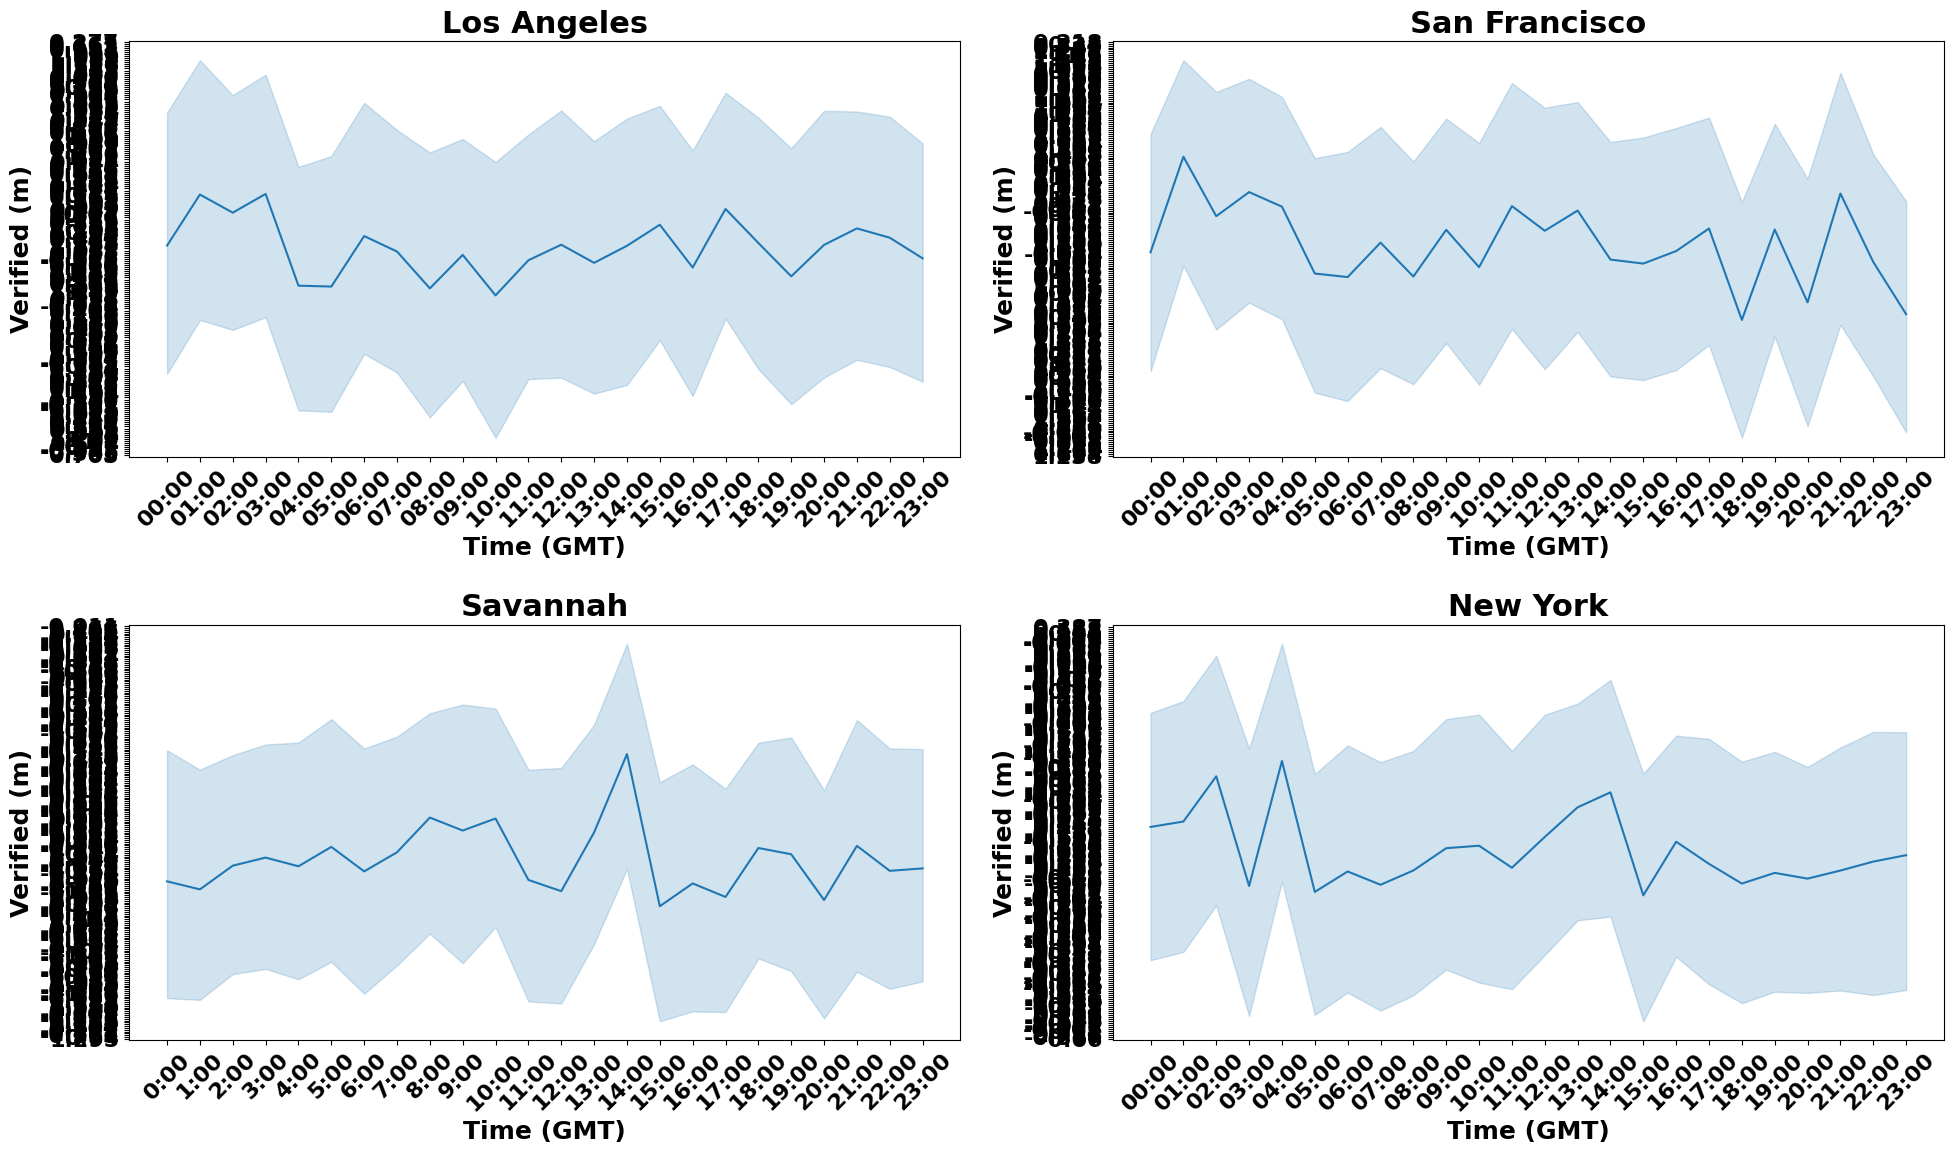

In [48]:
#hourly for april 2022
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))
#generate
sns.lineplot(legend = False,data = april_la, x='Time (GMT)', y='Verified (m)',hue = 'Month',ax=axs[0, 0])
axs[0, 0].set_title("Los Angeles", fontsize=22,fontweight='bold')

sns.lineplot(legend = False,data = april_sf, x='Time (GMT)', y='Verified (m)', hue = 'Month', ax=axs[0, 1])
axs[0, 1].set_title('San Francisco', fontsize=22,fontweight='bold')

sns.lineplot(legend = False, data = april_fp, x='Time (GMT)', y='Verified (m)', hue = 'Month', ax=axs[1, 0])
axs[1, 0].set_title('Savannah', fontsize=22,fontweight='bold')

sns.lineplot(legend = False,data = april_ny, x='Time (GMT)', y='Verified (m)', hue = 'Month',ax=axs[1, 1])
axs[1, 1].set_title('New York', fontsize=22,fontweight='bold')

# format
for ax in axs.flat:
    ax.set_xlabel('Time (GMT)', fontsize=18,fontweight='bold')
    ax.set_ylabel('Verified (m)', fontsize=18,fontweight='bold')

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=16, rotation=45)
    ax.tick_params(axis='y', labelsize=16)
    
plt.tight_layout()


C:\Users\Holt Leach\AppData\Local\Temp\ipykernel_13332\3385770713.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(legend = False,data = LA_hourly, x='Time (GMT)', y='Verified (m)', hue = 'Month',ci=None, ax=axs[0, 0]).set(title = 'Los Angeles')
C:\Users\Holt Leach\AppData\Local\Temp\ipykernel_13332\3385770713.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(legend = False,data = SF_hourly, x='Time (GMT)', y='Verified (m)', hue = 'Month',ci=None,ax=axs[0, 1]).set(title = 'San Francisco')
C:\Users\Holt Leach\AppData\Local\Temp\ipykernel_13332\3385770713.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = FP_hourly, x='Time (GMT)', y='Verified (m)', hue='Month',ci=None, ax=axs[1, 0]).set(title = 'Savannah')
C:\Users\Holt Leach\AppData\Local\Temp\ipykernel_13332\3385770713.py:17: FutureWarnin

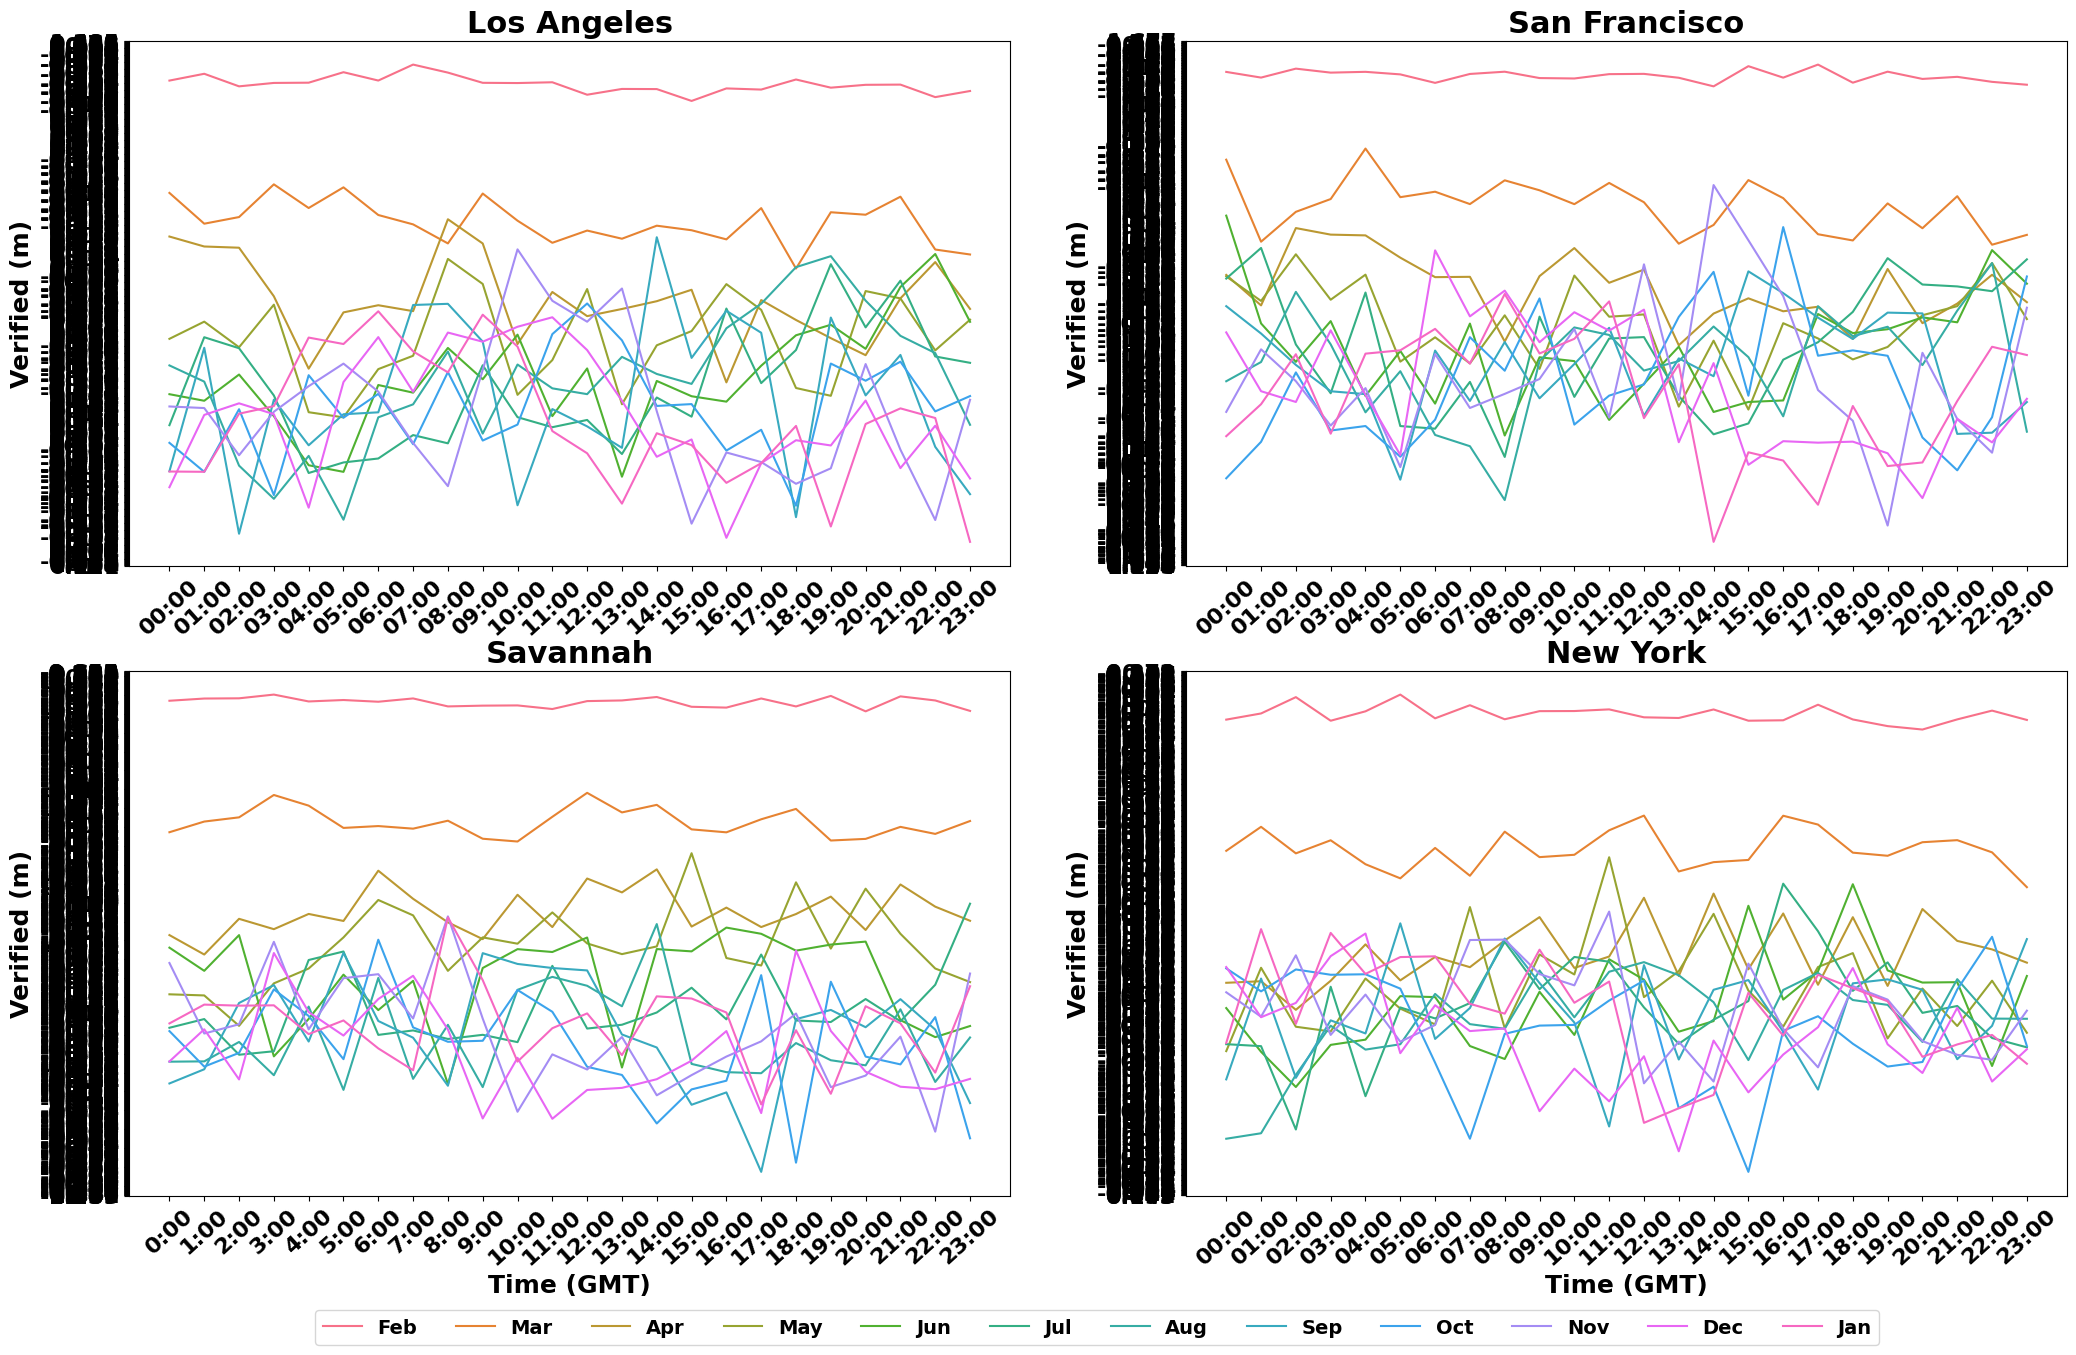

In [49]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(25, 15))

#generate
sns.lineplot(legend = False,data = LA_hourly, x='Time (GMT)', y='Verified (m)', hue = 'Month',ci=None, ax=axs[0, 0]).set(title = 'Los Angeles')
axs[0, 0].set_title("Los Angeles", fontsize=22,fontweight='bold')
axs[0, 0].set_xlabel('')

sns.lineplot(legend = False,data = SF_hourly, x='Time (GMT)', y='Verified (m)', hue = 'Month',ci=None,ax=axs[0, 1]).set(title = 'San Francisco')
axs[0, 1].set_title('San Francisco', fontsize=22,fontweight='bold')
axs[0, 1].set_xlabel('')

sns.lineplot(data = FP_hourly, x='Time (GMT)', y='Verified (m)', hue='Month',ci=None, ax=axs[1, 0]).set(title = 'Savannah')
axs[1, 0].set_title('Savannah', fontsize=22,fontweight='bold')
axs[1,0].legend(loc='upper left', bbox_to_anchor=(0.2, -0.2), ncol=12, fontsize=14)
axs[1,0].set_xlabel('Time (GMT)', fontsize=18,fontweight='bold')

sns.lineplot(legend = False,data = NY_hourly, x='Time (GMT)', y='Verified (m)', hue = 'Month',ci=None,ax=axs[1, 1]).set(title = 'New York')
axs[1, 1].set_title('New York', fontsize=22,fontweight='bold')
axs[1, 1].set_xlabel('Time (GMT)', fontsize=18,fontweight='bold')

# format
for ax in axs.flat:
    ax.set_ylabel('Verified (m)', fontsize=18,fontweight='bold')

for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=16, rotation=42)
    ax.tick_params(axis='y', labelsize=16)


# Part B Gaussian Processes

In [50]:
import pandas as pd
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, TimeSeriesSplit
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import gpflow
from gpflow.utilities import print_summary
import statsmodels.api as sm

In [51]:
plt.rcParams.update({'font.size': 16})

Monthly Data: San Francisco

In [52]:
df = pd.read_csv('San_Francisco_Monthly.csv')

In [53]:
df = df.rename(columns={'MHHW (m)' :'H(m)'})
df = df.dropna(subset=['H(m)']).reset_index()

In [54]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

start_point = df['Date'].dt.to_period('M').view(dtype='int64')[0] 
df['X'] = df['Date'].dt.to_period('M').view(dtype='int64') - start_point

In [55]:
filt = df['X'] < (df['X'].max()-60)
training = df[filt]
test = df[~filt]
X_train = training['X'].to_numpy()[:,np.newaxis]
y_train = training['H(m)'].to_numpy()
X_test = test['X'].to_numpy()[:,np.newaxis]
y_test = test['H(m)'].to_numpy()

Ridge

In [56]:
scaler = StandardScaler()
poly = PolynomialFeatures(3,include_bias=False)
X_train_poly = scaler.fit_transform(poly.fit_transform(X_train)) 

In [57]:
ridge_mdl = RidgeCV(alphas=np.logspace(1,3,10),fit_intercept=True,cv=TimeSeriesSplit(n_splits=20)) 

In [58]:
ridge_mdl.fit(X_train_poly,y_train)
print(ridge_mdl.alphas)
print(ridge_mdl.alpha_)

[  10.           16.68100537   27.82559402   46.41588834   77.42636827
  129.1549665   215.443469    359.38136638  599.48425032 1000.        ]
215.44346900318823


In [59]:
y_train_pred = ridge_mdl.predict(X_train_poly)
print(f'training error {mean_squared_error(y_train,y_train_pred):.5f}')
y_test_pred = ridge_mdl.predict(scaler.transform(poly.transform(X_test)))
print(f'test error {mean_squared_error(y_test_pred,y_test):.5f}')

training error 0.00742
test error 0.00616


Lasso

In [60]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [61]:
lambda_values = np.logspace(-4,-2,10) 
print(lambda_values)
lassoMdl = LassoCV(alphas=lambda_values,cv=10,max_iter=10000,fit_intercept=True,n_jobs=-1)
lassoMdl.fit(X_train_std, y_train)
print(lassoMdl.alpha_)

[0.0001     0.00016681 0.00027826 0.00046416 0.00077426 0.00129155
 0.00215443 0.00359381 0.00599484 0.01      ]
0.0001


In [62]:
y_pred_train = lassoMdl.predict(X_train_std)
y_pred_test = lassoMdl.predict(X_test_std)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))

0.007372850283685819
0.006156917311155386


Random Forest

In [63]:
n_estimators = [x for x in np.arange(50,400,50)]
max_depth = [x for x in np.arange(1, 30, 5)]
max_depth.append(None)

max_features = list(range(1,7))
max_features.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350], 'max_features': [1, 2, 3, 4, 5, 6, None], 'max_depth': [1, 6, 11, 16, 21, 26, None]}


In [64]:
rf_random = RandomizedSearchCV(estimator =  RandomForestRegressor(), param_distributions=random_grid, n_iter=200,
                               refit=True, pre_dispatch = 6, cv = 5, verbose=3, n_jobs = -1)

In [65]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 6, 11, 16, 21, 26,
                                                      None],
                                        'max_features': [1, 2, 3, 4, 5, 6,
                                                         None],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350]},
                   pre_dispatch=6, verbose=3)

In [66]:
rfMdl = rf_random.best_estimator_

In [67]:
y_pred_test_rf = rfMdl.predict(X_test)
y_pred_train_rf = rfMdl.predict(X_train)
print(mean_squared_error(y_pred_train_rf,y_train))
print(mean_squared_error(y_pred_test_rf,y_test))



0.0017326253350581145
0.006148239293317164


Model with lowest training error goes forward

In [68]:
arr = np.linspace(540,600,100)
X_trend = arr[:,np.newaxis]
y_trend = rfMdl.predict(X_trend)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

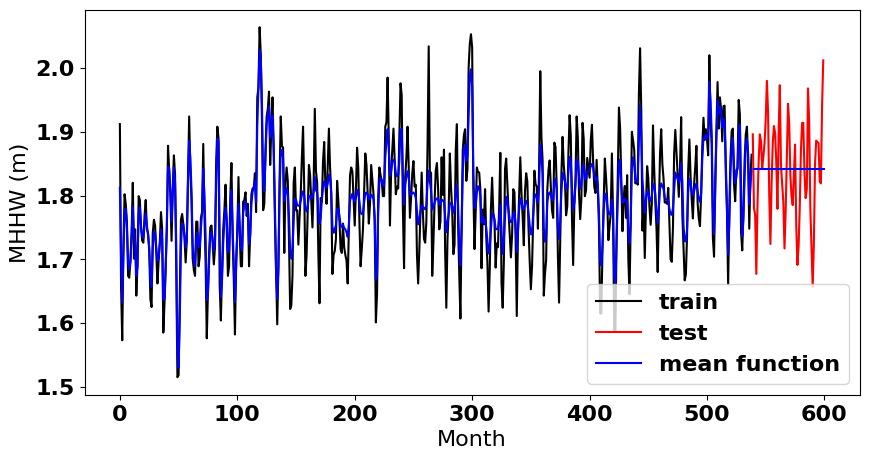

In [69]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_train,y_pred_train_rf,color='blue')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(arr,y_trend,color='blue',label='mean function')
ax.set_xlabel('Month')
ax.set_ylabel('MHHW (m)')
ax.legend()

In [70]:
residual_train = y_train - y_pred_train_rf
residual_test = y_test - y_pred_test_rf

In [71]:
opt = gpflow.optimizers.Scipy()

In [72]:
k = gpflow.kernels.Exponential(0.1,3) 
gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)

In [73]:
opt_logs = opt.minimize(gp_mdl.training_loss, gp_mdl.trainable_variables, options=dict(maxiter=300))
opt_logs

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -976.2520470317058
        x: [-5.540e-01 -6.357e+00 -2.230e+01]
      nit: 30
      jac: [-9.386e-04 -1.246e-03  3.204e-06]
     nfev: 46
     njev: 46
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [74]:
print_summary(gp_mdl)

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.00173 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.45403 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 0       │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

In [75]:
mu, _ = gp_mdl.predict_f(X_train.astype(np.float64))
print(f'training error {mean_squared_error(residual_train,mu):.5f}')
mu, _ = gp_mdl.predict_f(X_test.astype(np.float64))
print(f'test error {mean_squared_error(residual_test,mu):.5f}')

training error 0.00000
test error 0.00614


In [76]:
x_new = np.linspace(0,600,61)
residual, var = gp_mdl.predict_f(x_new[:,np.newaxis]) # it returns the mean and std of the GP prediction
residual = residual.numpy().flatten()
std = np.sqrt(var.numpy().flatten())
trend = rfMdl.predict((x_new[:,np.newaxis]))
mu = trend + residual


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

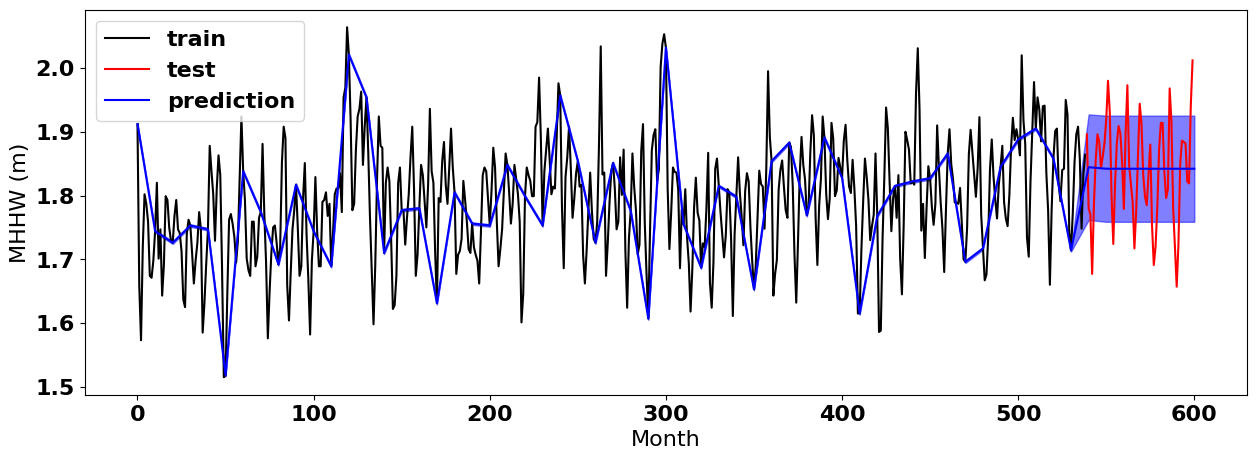

In [77]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(x_new,mu,color='blue',label='prediction')
ax.fill_between(x_new, (mu-2*std), (mu+2*std), color='b',alpha=0.5) # show prediction error
ax.set_xlabel('Month')
ax.set_ylabel('MHHW (m)')
ax.legend()

Second kernel

In [78]:
opt = gpflow.optimizers.Scipy()
k = gpflow.kernels.Periodic(gpflow.kernels.Exponential(0.1,4))
gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)

In [79]:
opt_logs = opt.minimize(gp_mdl.training_loss, gp_mdl.trainable_variables, options=dict(maxiter=300))
opt_logs

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -967.0272155173869
        x: [ 2.520e+00  3.945e+00 -2.121e+00 -6.867e+00]
      nit: 24
      jac: [-3.246e+04  4.301e+00 -1.585e+01  3.945e+00]
     nfev: 87
     njev: 87
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

In [80]:
print_summary(gp_mdl)

╒═════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                                │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.base_kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.11325 │
├─────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.base_kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 3.96376 │
├─────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.period                   │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 2.59701 │


In [81]:
mu, _ = gp_mdl.predict_f(X_train.astype(np.float64))
print(f'training error {mean_squared_error(residual_train,mu):.5f}')
mu, _ = gp_mdl.predict_f(X_test.astype(np.float64))
print(f'test error {mean_squared_error(residual_test,mu):.5f}')

training error 0.00085
test error 0.00505


In [82]:
x_new = np.linspace(0,600,100)
residual, var = gp_mdl.predict_f(x_new[:,np.newaxis])
residual = residual.numpy().flatten()
std = np.sqrt(var.numpy().flatten())
trend = rfMdl.predict((x_new[:,np.newaxis]))

mu = trend + residual

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

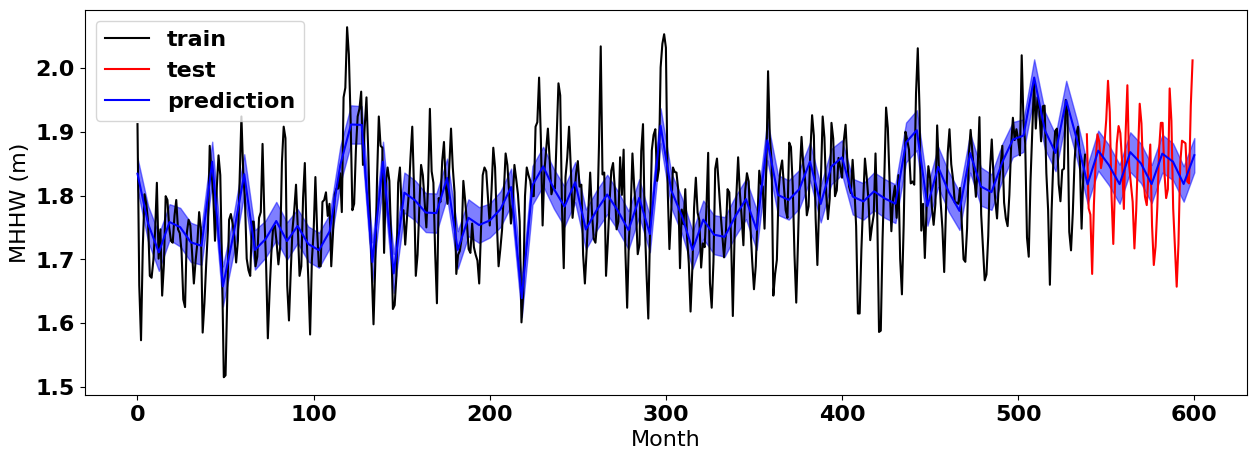

In [83]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(x_new,mu,color='blue',label='prediction')
ax.fill_between(x_new, (mu-2*std), (mu+2*std), color='b',alpha=0.5)
ax.set_xlabel('Month')
ax.set_ylabel('MHHW (m)')
ax.legend()

Hourly Data: San Francisco

In [84]:
df = pd.read_csv('San_Francisco_Hourly.csv')

In [85]:
df = df.rename(columns={'Verified (m)' :'H(m)'})
df = df.dropna(subset=['H(m)']).reset_index()
df = df[df['H(m)'] != '-']

In [86]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
#df['Time (GMT)'] = pd.to_time(df['Time (GMT)'], infer_datetime_format=True)

start_point = df['Date'].dt.to_period('D').view(dtype='int64')[0] 
df['I'] = df['Date'].dt.to_period('D').view(dtype='int64') - start_point

#start_point2 = df['Time (GMT)'].dt.to_period('h').view(dtype='int64')[0]
df['J'] = pd.DatetimeIndex(df['Time (GMT)']).hour
df['X'] = df['I'] * 24 + df['J']

In [87]:
filt1 = df['X'] >= (df['X'].max()-72)
filt2 = df['X'] > (df['X'].max()-672)
training = df[filt2]
training = training[~filt1]
test = df[filt1] 
X_train = training['X'].to_numpy()[:,np.newaxis]
y_train = training['H(m)'].astype(float)
X_test = test['X'].to_numpy()[:,np.newaxis]
y_test = test['H(m)'].astype(float)

C:\Users\Holt Leach\AppData\Local\Temp\ipykernel_13332\2803884468.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  training = training[~filt1]


In [88]:
baseline = X_train[0]

In [89]:
X_train = X_train - baseline

In [90]:
X_test = X_test - baseline

Ridge

In [91]:
scaler = StandardScaler()
poly = PolynomialFeatures(5,include_bias=False)
X_train_poly = scaler.fit_transform(poly.fit_transform(X_train)) 

In [92]:
ridge_mdl = RidgeCV(alphas=np.logspace(.5,10,20),fit_intercept=True,cv=TimeSeriesSplit(n_splits=20)) 

In [93]:
ridge_mdl.fit(X_train_poly,y_train)
print(ridge_mdl.alphas)
print(ridge_mdl.alpha_)

[3.16227766e+00 1.00000000e+01 3.16227766e+01 1.00000000e+02
 3.16227766e+02 1.00000000e+03 3.16227766e+03 1.00000000e+04
 3.16227766e+04 1.00000000e+05 3.16227766e+05 1.00000000e+06
 3.16227766e+06 1.00000000e+07 3.16227766e+07 1.00000000e+08
 3.16227766e+08 1.00000000e+09 3.16227766e+09 1.00000000e+10]
1000.0


In [94]:
y_train_pred = ridge_mdl.predict(X_train_poly)
print(f'training error {mean_squared_error(y_train,y_train_pred):.5f}')
y_test_pred = ridge_mdl.predict(scaler.transform(poly.transform(X_test)))
print(f'test error {mean_squared_error(y_test,y_test_pred):.5f}')

training error 0.33838
test error 0.24972


Lasso

In [95]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
lambda_values = np.logspace(-4,-2,10) 
print(lambda_values)

[0.0001     0.00016681 0.00027826 0.00046416 0.00077426 0.00129155
 0.00215443 0.00359381 0.00599484 0.01      ]


In [96]:
lassoMdl = LassoCV(alphas=lambda_values,cv=10,max_iter=10000,fit_intercept=True,n_jobs=-1)
lassoMdl.fit(X_train_std, y_train)
print(lassoMdl.alpha_)

0.005994842503189409


In [97]:
y_pred_train = lassoMdl.predict(X_train_std)
y_pred_test = lassoMdl.predict(X_test_std)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))

0.3383985664312519
0.22516066591292275


Random Forest

In [98]:
n_estimators = [x for x in np.arange(50,400,50)]
max_depth = [x for x in np.arange(1, 30, 5)]
max_depth.append(None)

In [99]:
max_features = list(range(1,7))
max_features.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350], 'max_features': [1, 2, 3, 4, 5, 6, None], 'max_depth': [1, 6, 11, 16, 21, 26, None]}


In [100]:
rf_random = RandomizedSearchCV(estimator =  RandomForestRegressor(), param_distributions=random_grid, n_iter=200,
                               refit=True, pre_dispatch = 6, cv = 5, verbose=3, n_jobs = -1)
rf_random.fit(X_train, y_train)
rfMdl = rf_random.best_estimator_
y_pred_test_rf = rfMdl.predict(X_test)
y_pred_train_rf = rfMdl.predict(X_train)
print(mean_squared_error(y_pred_train_rf,y_train))
print(mean_squared_error(y_pred_test_rf,y_test))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.3277163439276754
0.22372251319206482



Model with lowest training error goes forward

In [101]:
arr = np.linspace(600,672,125)
X_trend = arr[:,np.newaxis]
y_trend = rfMdl.predict(X_trend)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

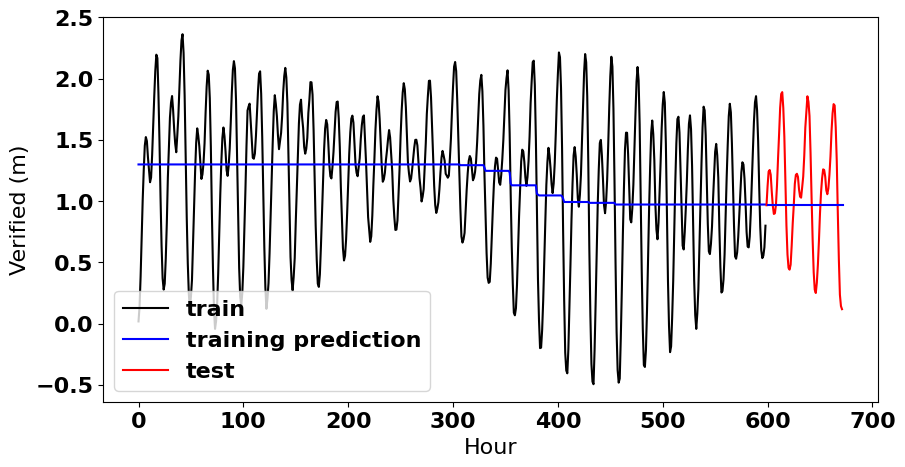

In [102]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_train,y_pred_train_rf,color='b', label = 'training prediction')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(arr,y_trend,color='blue')
ax.set_xlabel('Hour')
ax.set_ylabel('Verified (m)')
ax.legend()

In [103]:
residual_train = y_train - y_pred_train_rf
residual_test = y_test - y_pred_test_rf

In [104]:
opt = gpflow.optimizers.Scipy()

In [105]:
k = gpflow.kernels.Exponential(0.1,3) 
gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)

C:\Users\Holt Leach\AppData\Local\Temp\ipykernel_13332\2754874951.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)


In [106]:
opt_logs = opt.minimize(gp_mdl.training_loss, gp_mdl.trainable_variables, options=dict(maxiter=300))
opt_logs

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -42.07781380925405
        x: [ 6.132e+00 -9.139e-01 -2.247e+01]
      nit: 32
      jac: [ 4.888e-07 -2.954e-06  1.659e-06]
     nfev: 38
     njev: 38
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [107]:
print_summary(gp_mdl)

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.33714 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 6.13424 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 0       │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

In [108]:
mu, _ = gp_mdl.predict_f(X_train.astype(np.float64))
print(f'training error {mean_squared_error(residual_train,mu):.5f}')
mu, _ = gp_mdl.predict_f(X_test.astype(np.float64))
print(f'test error {mean_squared_error(residual_test,mu):.5f}')

training error 0.00000
test error 0.23581


In [109]:
x_new = np.linspace(0,672,125)
residual, var = gp_mdl.predict_f(x_new[:,np.newaxis]) # it returns the mean and std of the GP prediction
residual = residual.numpy().flatten()
std = np.sqrt(var.numpy().flatten())
trend = rfMdl.predict(x_new[:,np.newaxis])
mu = trend + residual

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

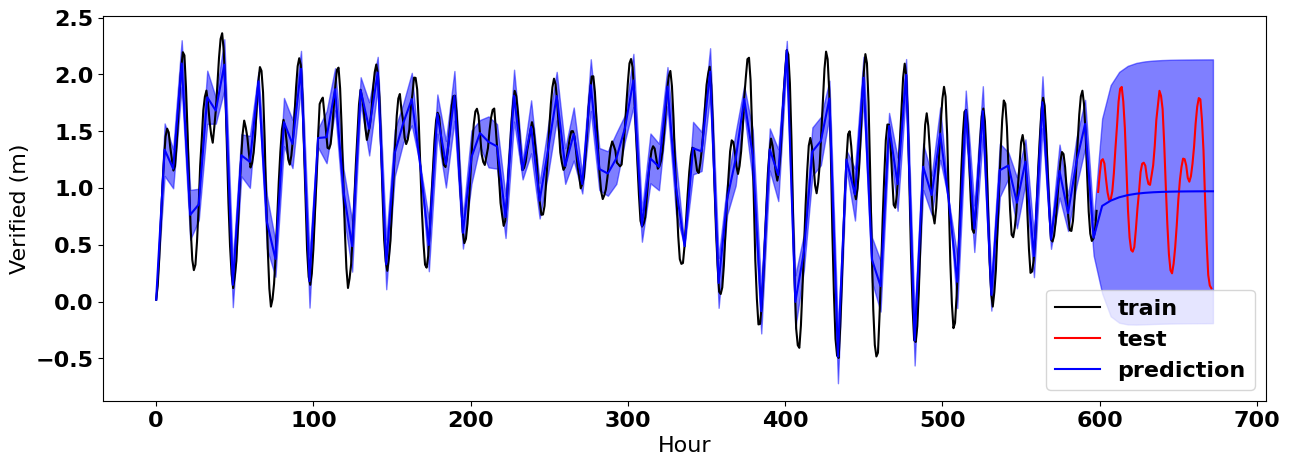

In [110]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(x_new,mu,color='blue',label='prediction')
ax.fill_between(x_new, (mu-2*std), (mu+2*std), color='b',alpha=0.5) # show prediction error
ax.set_xlabel('Hour')
ax.set_ylabel('Verified (m)')
ax.legend()

In [111]:
opt = gpflow.optimizers.Scipy()
k = gpflow.kernels.Periodic(gpflow.kernels.Exponential(0.1,4))
gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)

C:\Users\Holt Leach\AppData\Local\Temp\ipykernel_13332\3834780370.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)


In [112]:
opt_logs = opt.minimize(gp_mdl.training_loss, gp_mdl.trainable_variables, options=dict(maxiter=300))
opt_logs

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -209.56055563340237
        x: [ 1.602e+00  7.353e-01  9.951e+00 -1.793e+01]
      nit: 45
      jac: [ 2.349e+00  2.190e-01  5.851e-02  1.242e-04]
     nfev: 80
     njev: 80
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

In [113]:
print_summary(gp_mdl)

╒═════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                                │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.base_kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 9.95089 │
├─────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.base_kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 1.12694 │
├─────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.period                   │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 1.78583 │


In [114]:
mu, _ = gp_mdl.predict_f(X_train.astype(np.float64))
print(f'training error {mean_squared_error(residual_train,mu):.5f}')
mu, _ = gp_mdl.predict_f(X_test.astype(np.float64))
print(f'test error {mean_squared_error(residual_test,mu):.5f}')

training error 0.00000
test error 0.07856


In [115]:
x_new = np.linspace(0,672,125)
residual, var = gp_mdl.predict_f(x_new[:,np.newaxis])
residual = residual.numpy().flatten()
std = np.sqrt(var.numpy().flatten())
trend = rfMdl.predict(x_new[:,np.newaxis])

mu = trend + residual

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

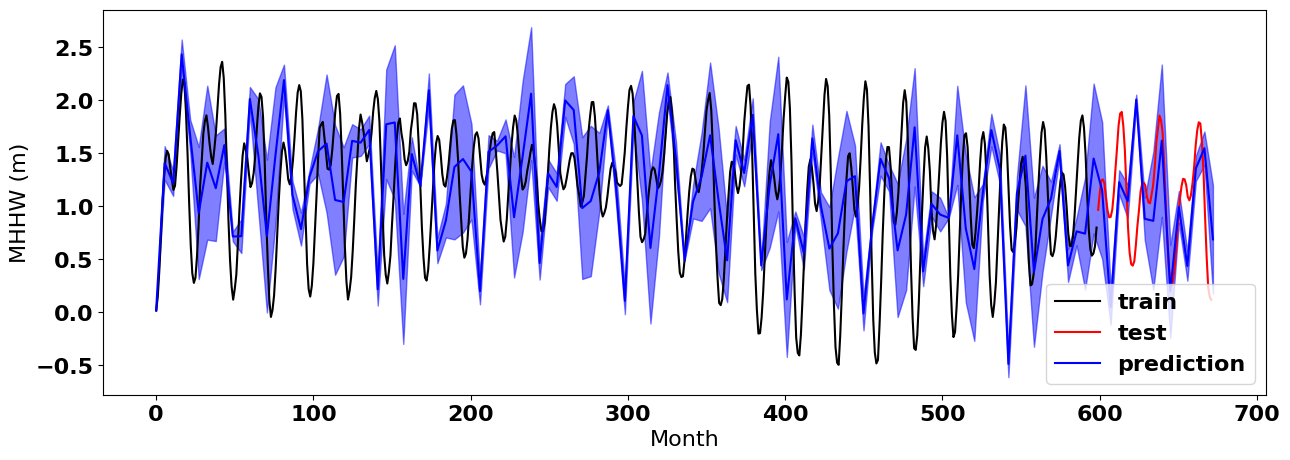

In [116]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(x_new,mu,color='blue',label='prediction')
ax.fill_between(x_new, (mu-2*std), (mu+2*std), color='b',alpha=0.5)
ax.set_xlabel('Month')
ax.set_ylabel('MHHW (m)')
ax.legend()

Monthly Data: New York

In [117]:
plt.rcParams.update({'font.size': 14})

In [118]:
df = pd.read_csv('New_York_Monthly.csv')

In [119]:
df = df.rename(columns={'MHHW (m)' :'H(m)'})
df = df.dropna(subset=['H(m)']).reset_index()

In [120]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

start_point = df['Date'].dt.to_period('M').view(dtype='int64')[0] 
df['X'] = df['Date'].dt.to_period('M').view(dtype='int64') - start_point

In [121]:
filt = df['X'] < (df['X'].max()-60)
training = df[filt]
test = df[~filt]
X_train = training['X'].to_numpy()[:,np.newaxis]
y_train = training['H(m)'].to_numpy()
X_test = test['X'].to_numpy()[:,np.newaxis]
y_test = test['H(m)'].to_numpy()

Ridge

In [122]:
scaler = StandardScaler()
poly = PolynomialFeatures(3,include_bias=False)
X_train_poly = scaler.fit_transform(poly.fit_transform(X_train)) 

In [123]:
ridge_mdl = RidgeCV(alphas=np.logspace(1,3,10),fit_intercept=True,cv=TimeSeriesSplit(n_splits=20)) 

In [124]:
ridge_mdl.fit(X_train_poly,y_train)
print(ridge_mdl.alphas)
print(ridge_mdl.alpha_)

[  10.           16.68100537   27.82559402   46.41588834   77.42636827
  129.1549665   215.443469    359.38136638  599.48425032 1000.        ]
27.825594022071243


In [125]:
y_train_pred = ridge_mdl.predict(X_train_poly)
print(f'training error {mean_squared_error(y_train,y_train_pred):.5f}')
y_test_pred = ridge_mdl.predict(scaler.transform(poly.transform(X_test)))
print(f'test error {mean_squared_error(y_test_pred,y_test):.5f}')

training error 0.00660
test error 0.00706


Lasso

In [126]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [127]:
lambda_values = np.logspace(-4,-2,10) 
print(lambda_values)
lassoMdl = LassoCV(alphas=lambda_values,cv=10,max_iter=10000,fit_intercept=True,n_jobs=-1)
lassoMdl.fit(X_train_std, y_train)
print(lassoMdl.alpha_)

[0.0001     0.00016681 0.00027826 0.00046416 0.00077426 0.00129155
 0.00215443 0.00359381 0.00599484 0.01      ]
0.0001


In [128]:
y_pred_train = lassoMdl.predict(X_train_std)
y_pred_test = lassoMdl.predict(X_test_std)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))

0.006793812295921264
0.007992962838327674


Random Forest

In [129]:
n_estimators = [x for x in np.arange(50,400,50)]
max_depth = [x for x in np.arange(1, 30, 5)]
max_depth.append(None)

max_features = list(range(1,7))
max_features.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350], 'max_features': [1, 2, 3, 4, 5, 6, None], 'max_depth': [1, 6, 11, 16, 21, 26, None]}


In [130]:
rf_random = RandomizedSearchCV(estimator =  RandomForestRegressor(), param_distributions=random_grid, n_iter=200,
                               refit=True, pre_dispatch = 6, cv = 5, verbose=3, n_jobs = -1)

In [131]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 6, 11, 16, 21, 26,
                                                      None],
                                        'max_features': [1, 2, 3, 4, 5, 6,
                                                         None],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350]},
                   pre_dispatch=6, verbose=3)

In [132]:
rfMdl = rf_random.best_estimator_

In [133]:
y_pred_test_rf = rfMdl.predict(X_test)
y_pred_train_rf = rfMdl.predict(X_train)
print(mean_squared_error(y_pred_train_rf,y_train))
print(mean_squared_error(y_pred_test_rf,y_test))



0.006337494374705442
0.009697377671395177


Model with lowest training error goes forward

In [134]:
arr = np.linspace(540,600,100)
X_trend = arr[:,np.newaxis]
y_trend = rfMdl.predict(X_trend)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

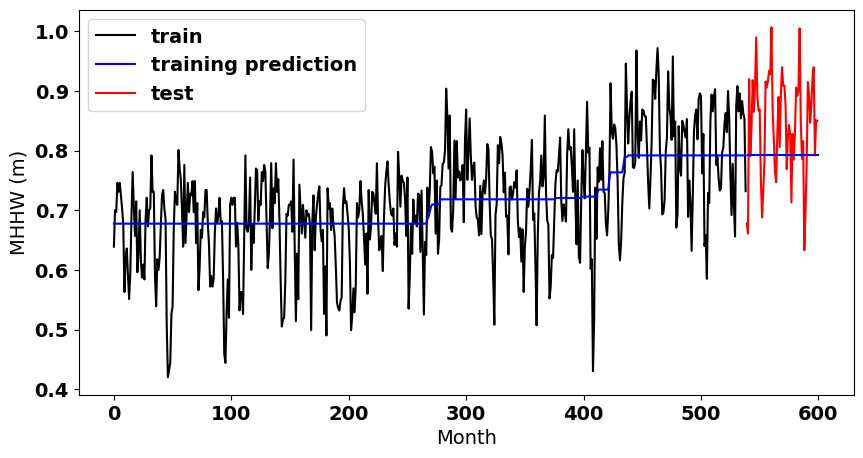

In [135]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_train,y_pred_train_rf,color='blue', label='training prediction')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(arr,y_trend,color='blue')
ax.set_xlabel('Month')
ax.set_ylabel('MHHW (m)')
ax.legend()

In [136]:
residual_train = y_train - y_pred_train_rf
residual_test = y_test - y_pred_test_rf

In [137]:
opt = gpflow.optimizers.Scipy()

In [138]:
k = gpflow.kernels.Exponential(0.1,3) 
gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)

In [139]:
opt_logs = opt.minimize(gp_mdl.training_loss, gp_mdl.trainable_variables, options=dict(maxiter=300))
opt_logs

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -714.4870578403261
        x: [ 5.774e-01 -5.099e+00 -8.308e+00]
      nit: 27
      jac: [ 5.466e-05 -7.621e-05 -1.508e-05]
     nfev: 38
     njev: 38
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [140]:
print_summary(gp_mdl)

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.00608 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 1.02293 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 0.00025 │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

In [141]:
mu, _ = gp_mdl.predict_f(X_train.astype(np.float64))
print(f'training error {mean_squared_error(residual_train,mu):.5f}')
mu, _ = gp_mdl.predict_f(X_test.astype(np.float64))
print(f'test error {mean_squared_error(residual_test,mu):.5f}')

training error 0.00002
test error 0.00960


In [142]:
plt.rcParams.update({'font.size': 16})

In [143]:
x_new = np.linspace(0,600,61)
residual, var = gp_mdl.predict_f(x_new[:,np.newaxis]) # it returns the mean and std of the GP prediction
residual = residual.numpy().flatten()
std = np.sqrt(var.numpy().flatten())
trend = rfMdl.predict((x_new[:,np.newaxis]))
mu = trend + residual


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

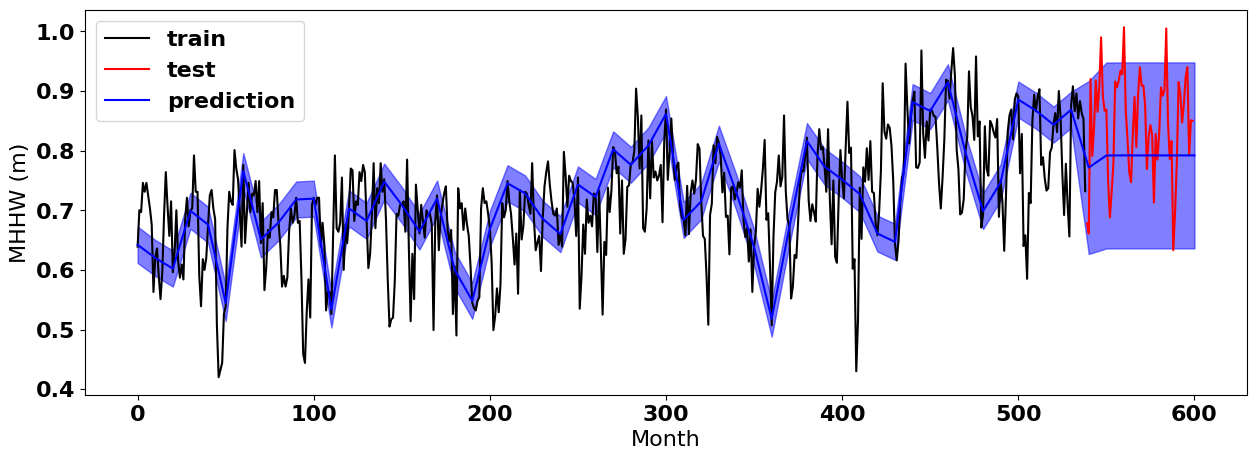

In [144]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(x_new,mu,color='blue',label='prediction')
ax.fill_between(x_new, (mu-2*std), (mu+2*std), color='b',alpha=0.5) # show prediction error
ax.set_xlabel('Month')
ax.set_ylabel('MHHW (m)')
ax.legend()

Second kernel

In [145]:
opt = gpflow.optimizers.Scipy()
k = gpflow.kernels.Periodic(gpflow.kernels.Exponential(0.1,4))
gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)

In [146]:
opt_logs = opt.minimize(gp_mdl.training_loss, gp_mdl.trainable_variables, options=dict(maxiter=300))
opt_logs

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -581.4343506488211
        x: [ 2.282e+00  3.991e+00 -2.306e+00 -5.127e+00]
      nit: 15
      jac: [ 2.242e+03 -8.871e-01  4.044e+00  6.613e-01]
     nfev: 105
     njev: 105
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

In [147]:
print_summary(gp_mdl)

╒═════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                                │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.base_kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.09501 │
├─────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.base_kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 4.00911 │
├─────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.period                   │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 2.37879 │


In [148]:
mu, _ = gp_mdl.predict_f(X_train.astype(np.float64))
print(f'training error {mean_squared_error(residual_train,mu):.5f}')
mu, _ = gp_mdl.predict_f(X_test.astype(np.float64))
print(f'test error {mean_squared_error(residual_test,mu):.5f}')

training error 0.00547
test error 0.00953


In [149]:
x_new = np.linspace(0,600,100)
residual, var = gp_mdl.predict_f(x_new[:,np.newaxis])
residual = residual.numpy().flatten()
std = np.sqrt(var.numpy().flatten())
trend = rfMdl.predict((x_new[:,np.newaxis]))

mu = trend + residual

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

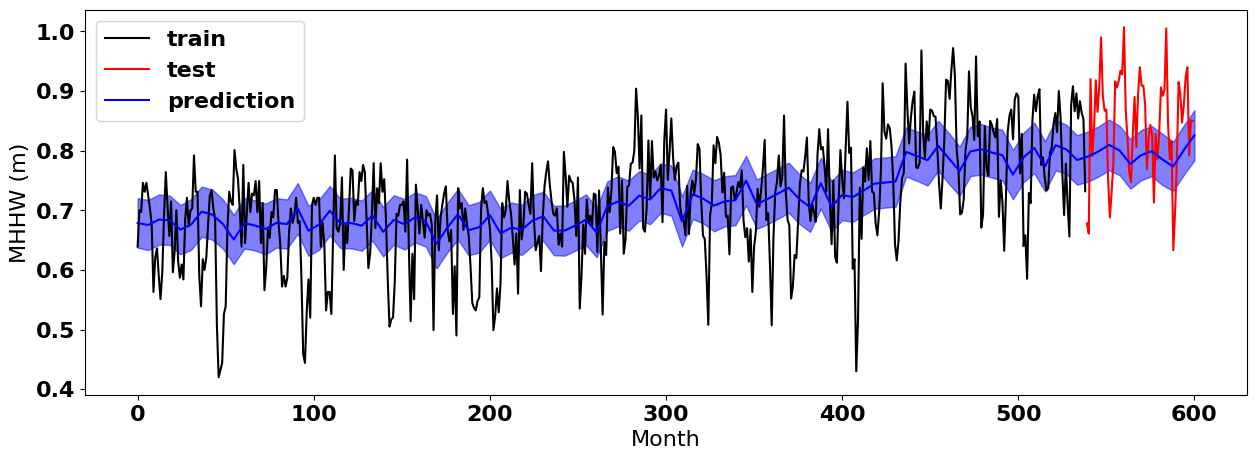

In [150]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(x_new,mu,color='blue',label='prediction')
ax.fill_between(x_new, (mu-2*std), (mu+2*std), color='b',alpha=0.5)
ax.set_xlabel('Month')
ax.set_ylabel('MHHW (m)')
ax.legend()

Hourly Data: New York

In [151]:
plt.rcParams.update({'font.size': 14})

In [152]:
df = pd.read_csv('New_York_Hourly.csv')

In [153]:
df = df.rename(columns={'Verified (m)' :'H(m)'})
df = df.dropna(subset=['H(m)']).reset_index()
df = df[df['H(m)'] != '-']

In [154]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
#df['Time (GMT)'] = pd.to_time(df['Time (GMT)'], infer_datetime_format=True)

start_point = df['Date'].dt.to_period('D').view(dtype='int64')[0] 
df['I'] = df['Date'].dt.to_period('D').view(dtype='int64') - start_point

#start_point2 = df['Time (GMT)'].dt.to_period('h').view(dtype='int64')[0]
df['J'] = pd.DatetimeIndex(df['Time (GMT)']).hour
df['X'] = df['I'] * 24 + df['J']

In [155]:
filt1 = df['X'] >= (df['X'].max()-72)
filt2 = df['X'] > (df['X'].max()-672)
training = df[filt2]
training = training[~filt1]
test = df[filt1] 
X_train = training['X'].to_numpy()[:,np.newaxis]
y_train = training['H(m)'].astype(float)
X_test = test['X'].to_numpy()[:,np.newaxis]
y_test = test['H(m)'].astype(float)

C:\Users\Holt Leach\AppData\Local\Temp\ipykernel_13332\2803884468.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  training = training[~filt1]


In [156]:
baseline = X_train[0]

In [157]:
X_train = X_train - baseline

In [158]:
X_test = X_test - baseline

Ridge

In [159]:
scaler = StandardScaler()
poly = PolynomialFeatures(5,include_bias=False)
X_train_poly = scaler.fit_transform(poly.fit_transform(X_train)) 

In [160]:
ridge_mdl = RidgeCV(alphas=np.logspace(.5,10,20),fit_intercept=True,cv=TimeSeriesSplit(n_splits=20)) 

In [161]:
ridge_mdl.fit(X_train_poly,y_train)
print(ridge_mdl.alphas)
print(ridge_mdl.alpha_)

[3.16227766e+00 1.00000000e+01 3.16227766e+01 1.00000000e+02
 3.16227766e+02 1.00000000e+03 3.16227766e+03 1.00000000e+04
 3.16227766e+04 1.00000000e+05 3.16227766e+05 1.00000000e+06
 3.16227766e+06 1.00000000e+07 3.16227766e+07 1.00000000e+08
 3.16227766e+08 1.00000000e+09 3.16227766e+09 1.00000000e+10]
1000.0


In [162]:
y_train_pred = ridge_mdl.predict(X_train_poly)
print(f'training error {mean_squared_error(y_train,y_train_pred):.5f}')
y_test_pred = ridge_mdl.predict(scaler.transform(poly.transform(X_test)))
print(f'test error {mean_squared_error(y_test,y_test_pred):.5f}')

training error 0.28371
test error 0.16361


Lasso

In [163]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
lambda_values = np.logspace(-4,-2,10) 
print(lambda_values)

[0.0001     0.00016681 0.00027826 0.00046416 0.00077426 0.00129155
 0.00215443 0.00359381 0.00599484 0.01      ]


In [164]:
lassoMdl = LassoCV(alphas=lambda_values,cv=10,max_iter=10000,fit_intercept=True,n_jobs=-1)
lassoMdl.fit(X_train_std, y_train)
print(lassoMdl.alpha_)

0.0001


In [165]:
y_pred_train = lassoMdl.predict(X_train_std)
y_pred_test = lassoMdl.predict(X_test_std)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))

0.28504595012175427
0.15116072644297146


Random Forest

In [166]:
n_estimators = [x for x in np.arange(50,400,50)]
max_depth = [x for x in np.arange(1, 30, 5)]
max_depth.append(None)

In [167]:
max_features = list(range(1,7))
max_features.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350], 'max_features': [1, 2, 3, 4, 5, 6, None], 'max_depth': [1, 6, 11, 16, 21, 26, None]}


In [168]:
rf_random = RandomizedSearchCV(estimator =  RandomForestRegressor(), param_distributions=random_grid, n_iter=200,
                               refit=True, pre_dispatch = 6, cv = 5, verbose=3, n_jobs = -1)
rf_random.fit(X_train, y_train)
rfMdl = rf_random.best_estimator_
y_pred_test_rf = rfMdl.predict(X_test)
y_pred_train_rf = rfMdl.predict(X_train)
print(mean_squared_error(y_pred_train_rf,y_train))
print(mean_squared_error(y_pred_test_rf,y_test))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.2793850902447204
0.16139955066436762



Model with lowest training error goes forward

In [169]:
arr = np.linspace(600,672,125)
X_trend = arr[:,np.newaxis]
y_trend = rfMdl.predict(X_trend)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

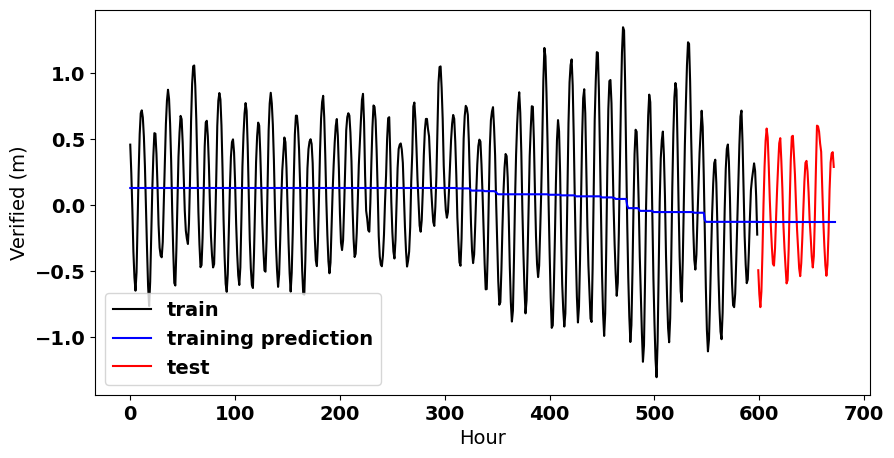

In [170]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_train,y_pred_train_rf,color='blue', label = 'training prediction')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(arr,y_trend,color='blue')
ax.set_xlabel('Hour')
ax.set_ylabel('Verified (m)')
ax.legend()

In [171]:
plt.rcParams.update({'font.size': 16})

In [172]:
residual_train = y_train - y_pred_train_rf
residual_test = y_test - y_pred_test_rf

In [173]:
opt = gpflow.optimizers.Scipy()

In [174]:
k = gpflow.kernels.Exponential(0.1,3) 
gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)

C:\Users\Holt Leach\AppData\Local\Temp\ipykernel_13332\2754874951.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)


In [175]:
opt_logs = opt.minimize(gp_mdl.training_loss, gp_mdl.trainable_variables, options=dict(maxiter=300))
opt_logs

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 21.688054478968297
        x: [ 3.868e+00 -1.142e+00 -2.545e+01]
      nit: 35
      jac: [ 3.436e-06 -8.334e-06  6.284e-08]
     nfev: 40
     njev: 40
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [176]:
print_summary(gp_mdl)

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.2769  │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 3.88846 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 0       │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

In [177]:
mu, _ = gp_mdl.predict_f(X_train.astype(np.float64))
print(f'training error {mean_squared_error(residual_train,mu):.5f}')
mu, _ = gp_mdl.predict_f(X_test.astype(np.float64))
print(f'test error {mean_squared_error(residual_test,mu):.5f}')

training error 0.00000
test error 0.16019


In [178]:
x_new = np.linspace(0,672,125)
residual, var = gp_mdl.predict_f(x_new[:,np.newaxis]) # it returns the mean and std of the GP prediction
residual = residual.numpy().flatten()
std = np.sqrt(var.numpy().flatten())
trend = rfMdl.predict(x_new[:,np.newaxis])
mu = trend + residual

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

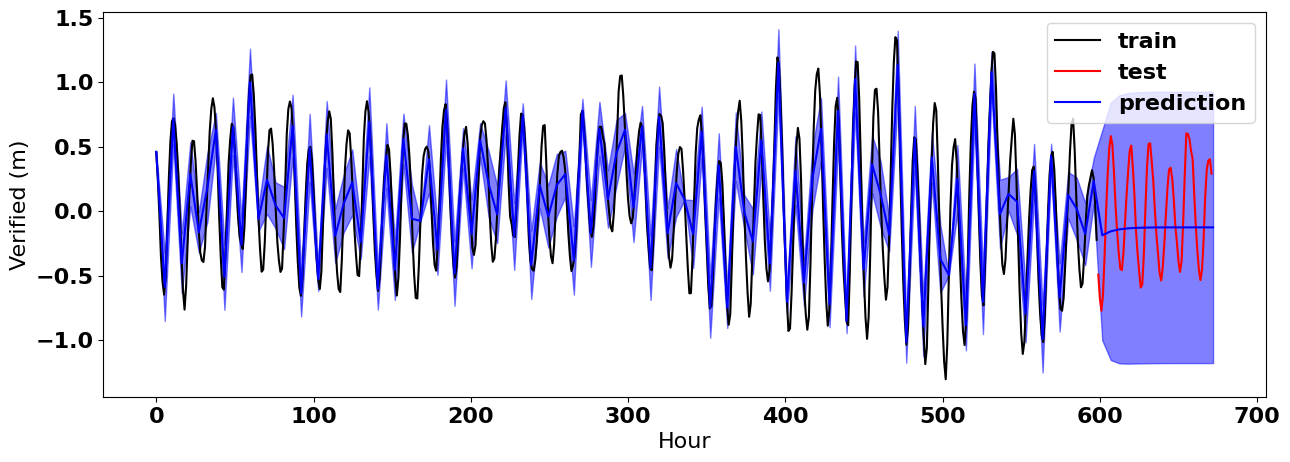

In [179]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(x_new,mu,color='blue',label='prediction')
ax.fill_between(x_new, (mu-2*std), (mu+2*std), color='b',alpha=0.5) # show prediction error
ax.set_xlabel('Hour')
ax.set_ylabel('Verified (m)')
ax.legend()

In [180]:
opt = gpflow.optimizers.Scipy()
k = gpflow.kernels.Periodic(gpflow.kernels.Exponential(0.1,4))
gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)

C:\Users\Holt Leach\AppData\Local\Temp\ipykernel_13332\3834780370.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gp_mdl = gpflow.models.GPR(data=(X_train.astype(np.float64), residual_train[:,np.newaxis]), kernel= k)


In [181]:
opt_logs = opt.minimize(gp_mdl.training_loss, gp_mdl.trainable_variables, options=dict(maxiter=300))
opt_logs

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: nan
        x: [ 2.009e+00  3.989e+00 -2.292e+00 -1.182e+00]
      nit: 6
      jac: [ 8.155e+02 -4.872e-01  2.468e+00 -1.328e+01]
     nfev: 47
     njev: 47
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

In [182]:
print_summary(gp_mdl)

╒═════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                                │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.base_kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.09632 │
├─────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.base_kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 4.00756 │
├─────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.period                   │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 2.13464 │


In [183]:
mu, _ = gp_mdl.predict_f(X_train.astype(np.float64))
print(f'training error {mean_squared_error(residual_train,mu):.5f}')
mu, _ = gp_mdl.predict_f(X_test.astype(np.float64))
print(f'test error {mean_squared_error(residual_test,mu):.5f}')

training error 0.27802
test error 0.16186


In [184]:
x_new = np.linspace(0,672,100)
residual, var = gp_mdl.predict_f(x_new[:,np.newaxis])
residual = residual.numpy().flatten()
std = np.sqrt(var.numpy().flatten())
trend = rfMdl.predict(x_new[:,np.newaxis])
mu = trend + residual

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

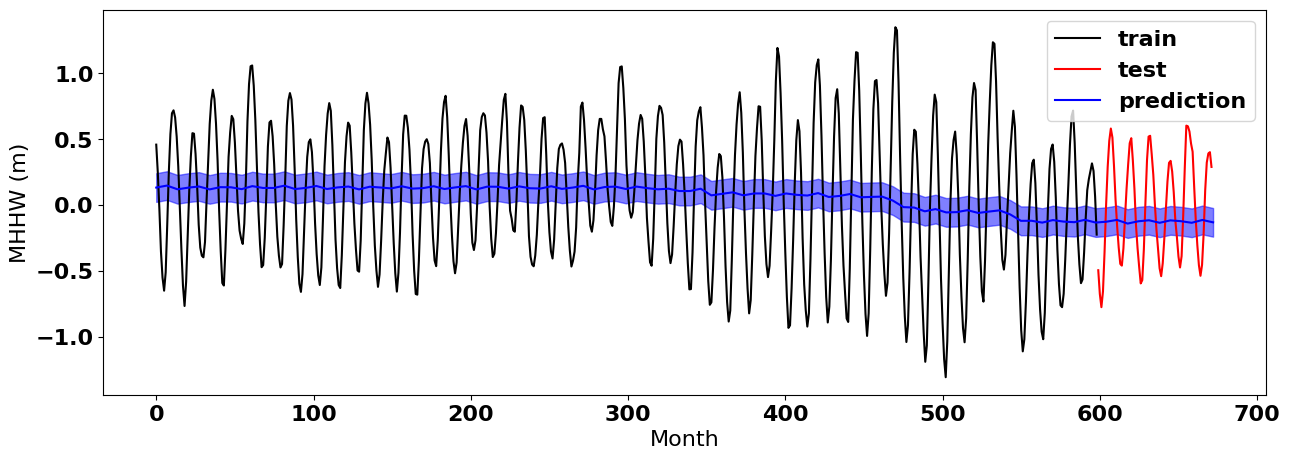

In [185]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(X_train,y_train,color='k',label='train')
ax.plot(X_test,y_test,color='red',label='test')
ax.plot(x_new,mu,color='blue',label='prediction')
ax.fill_between(x_new, (mu-2*std), (mu+2*std), color='b',alpha=0.5) 
ax.set_xlabel('Month')
ax.set_ylabel('MHHW (m)')
ax.legend()